In [227]:
#Importing the standard libraries for data manipulation and analysis
import numpy as np    
import pandas as pd
#Importing the plotting and visualization library for the mathematical and numerical analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline      
#%matplotlib inline sets the backend of matplotlib to the inline backend that displays outputs of plotting commands.
import io
import warnings
warnings.filterwarnings("ignore")   #To ignore any warning

In [228]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease (1).csv to kidney_disease (1) (1).csv


In [229]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['kidney_disease (1).csv']))
 #reading data
df = pd.read_csv("kidney_disease (1).csv")

In [230]:
df.head()

id   age    bp     sg   al   su  ...   dm cad appet   pe  ane  classification
0   0  48.0  80.0  1.020  1.0  0.0  ...  yes  no  good   no   no             ckd
1   1   7.0  50.0  1.020  4.0  0.0  ...   no  no  good   no   no             ckd
2   2  62.0  80.0  1.010  2.0  3.0  ...  yes  no  poor   no  yes             ckd
3   3  48.0  70.0  1.005  4.0  0.0  ...   no  no  poor  yes  yes             ckd
4   4  51.0  80.0  1.010  2.0  0.0  ...   no  no  good   no   no             ckd

[5 rows x 26 columns]

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [232]:

pd.set_option('display.max_rows', 400)
display(df)

UFuncTypeError: ignored

TypeError: ignored

In [233]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [234]:
df.classification=df.classification.replace("ckd\t","ckd")

In [235]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [236]:
def plotvariable(df,variable):
  plt.figure(figsize=(16,4))
  #histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha=0.5)
  #boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.show()

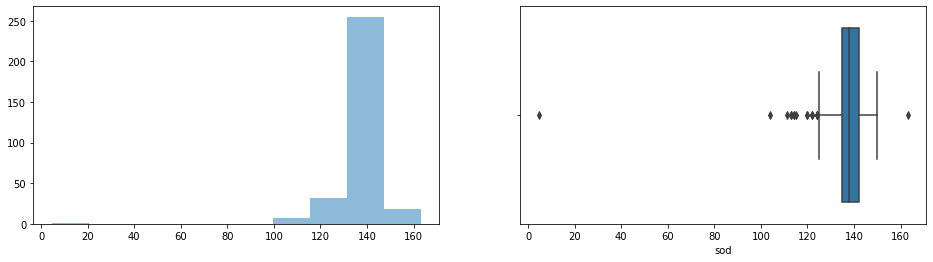

In [237]:
plotvariable(df,'sod')

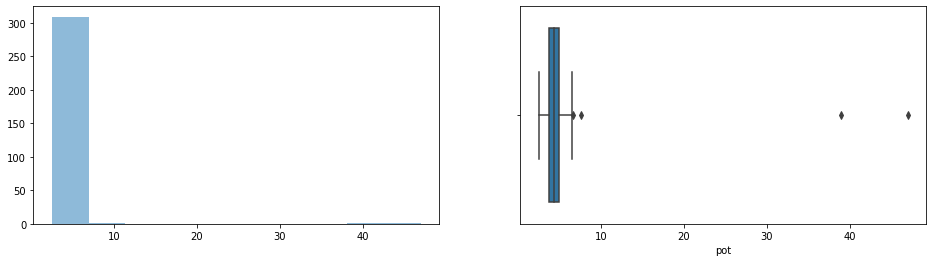

In [238]:
plotvariable(df,'pot')

In [239]:
def find_boundaries(df, variable):
  Q1=df[variable].quantile(.25)
  Q3=df[variable].quantile(.75)
  IQR=Q3-Q1
  lower_boundary=Q1-1.5*IQR
  upper_boundary=Q3+1.5*IQR
  return lower_boundary, upper_boundary

In [240]:
lower_sod,upper_sod=find_boundaries(df,'sod')
print("upper limit of sod", upper_sod)
print("lower limit of sod", lower_sod)

upper limit of sod 152.5
lower limit of sod 124.5


In [241]:
outlier_sod=np.where(df['sod']>upper_sod,True,
                     np.where(df['sod']<lower_sod,True,False))

In [242]:
outlier_sod

array([False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [243]:
df.shape

(400, 26)

In [244]:
engineered_data= df.loc[~(outlier_sod),]

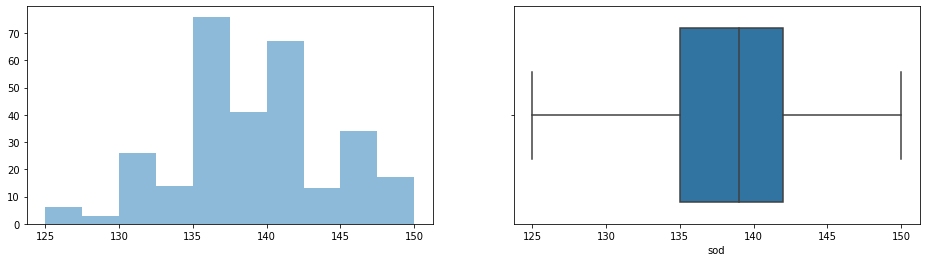

In [245]:
plotvariable(engineered_data,'sod')

In [246]:
lower_pot,upper_pot=find_boundaries(df,'pot')
print("upper limit of pot", upper_pot)
print("lower limit of pot", lower_pot)

upper limit of pot 6.550000000000001
lower limit of pot 2.149999999999999


In [247]:
outlier_pot=np.where(df['pot']>upper_pot,True,
                     np.where(df['pot']<lower_pot,True,False))

In [248]:
outlier_pot

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [249]:
engineered_data= df.loc[~(outlier_pot),]

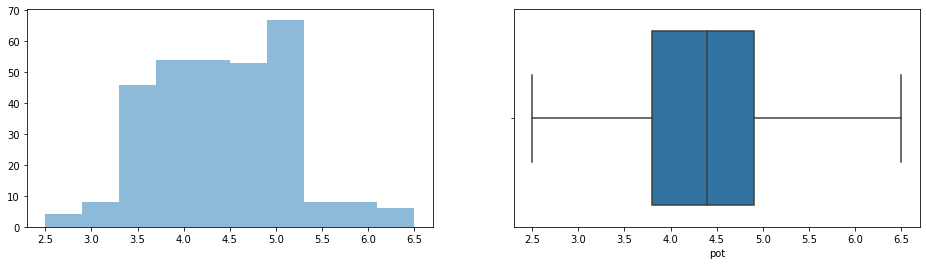

In [250]:
plotvariable(engineered_data,'pot')

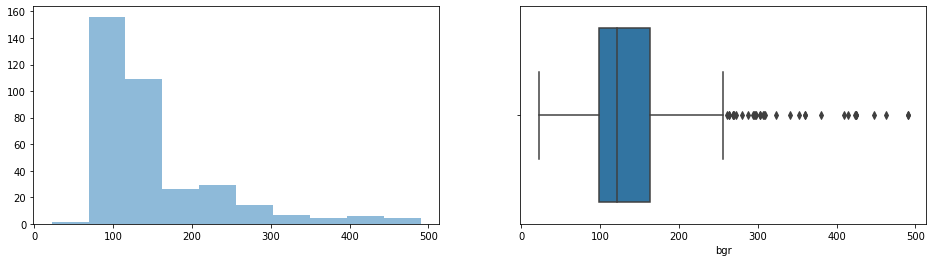

In [251]:
plotvariable(df,'bgr')

In [252]:
lower_bgr,upper_bgr=find_boundaries(df,'bgr')
print("upper limit of bgr", upper_bgr)
print("lower limit of bgr", lower_bgr)

upper limit of bgr 259.0
lower limit of bgr 3.0


In [253]:
df['bgr']=np.where(df['bgr']>upper_bgr,upper_bgr,
                     np.where(df['bgr']<lower_bgr,lower_bgr,df['bgr']))

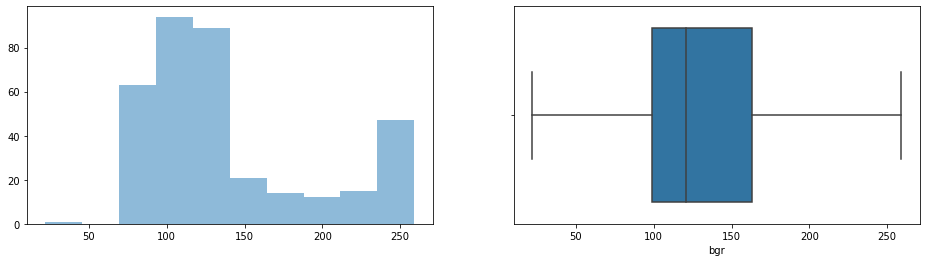

In [254]:
plotvariable(df,'bgr')

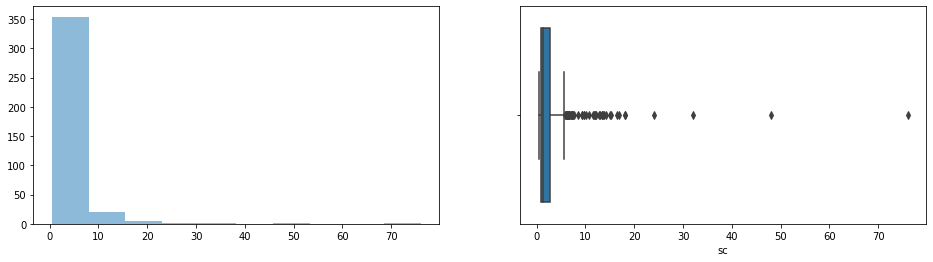

In [255]:
plotvariable(df,'sc')

In [256]:
lower_sc,upper_sc=find_boundaries(df,'sc')
print("upper limit of sc", upper_sc)
print("lower limit of sc", lower_sc)

upper limit of sc 5.6499999999999995
lower limit of sc -1.9499999999999997


In [257]:
outlier_sc=np.where(df['sc']>upper_sc,True,
                     np.where(df['sc']<lower_sc,True,False))

In [258]:
engineered_data= df.loc[~(outlier_sc),]

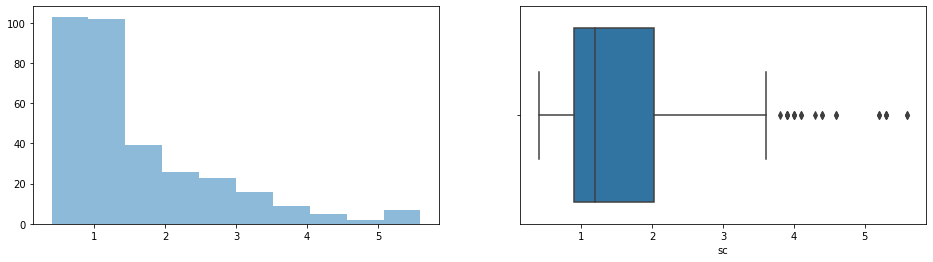

In [259]:
plotvariable(engineered_data,'sc')

In [260]:
df['sc']=np.where(df['sc']>upper_sc,upper_sc,
                     np.where(df['sc']<lower_sc,lower_sc,df['sc']))

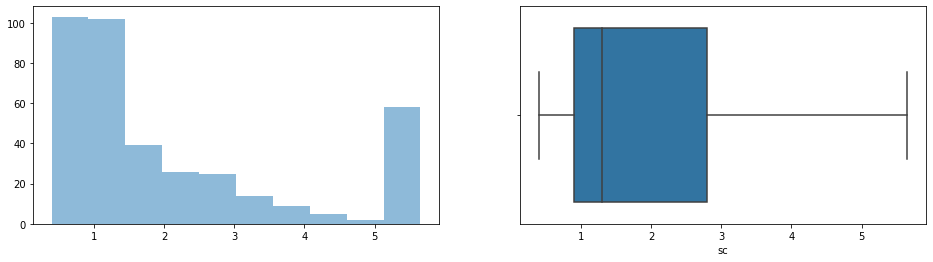

In [261]:
plotvariable(df,'sc')

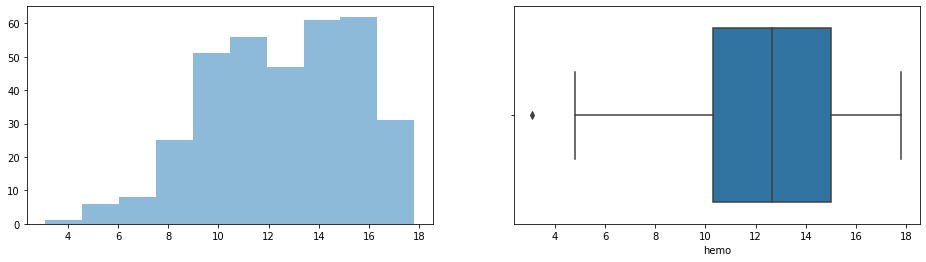

In [262]:
plotvariable(df,'hemo')

In [263]:
df.head()

id   age    bp     sg   al   su  ...   dm cad appet   pe  ane  classification
0   0  48.0  80.0  1.020  1.0  0.0  ...  yes  no  good   no   no             ckd
1   1   7.0  50.0  1.020  4.0  0.0  ...   no  no  good   no   no             ckd
2   2  62.0  80.0  1.010  2.0  3.0  ...  yes  no  poor   no  yes             ckd
3   3  48.0  70.0  1.005  4.0  0.0  ...   no  no  poor  yes  yes             ckd
4   4  51.0  80.0  1.010  2.0  0.0  ...   no  no  good   no   no             ckd

[5 rows x 26 columns]

In [264]:
missing_cat=[var for var in df.columns if df[var].isnull().mean()>0 and df[var].dtype=='O']

In [265]:
missing_cat

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [266]:
df['rbc'].isnull().sum()

152

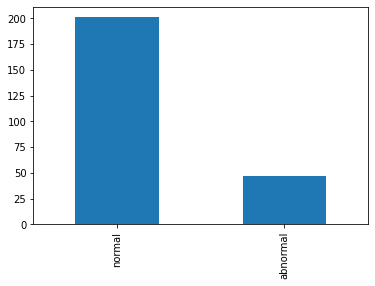

In [267]:
df['rbc'].value_counts().plot.bar()

In [268]:
df['rbc'].fillna('normal',inplace=True)

In [269]:
df['pc'].isnull().sum()

65

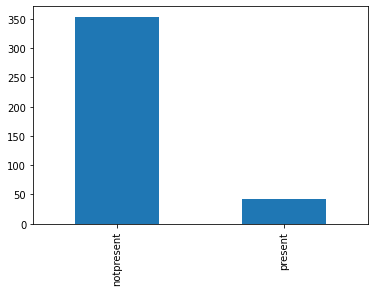

In [270]:
df['pcc'].value_counts().plot.bar()

In [271]:
df['pcc'].fillna('notpresent',inplace=True)

In [272]:
df['pcc'].isnull().sum()

0

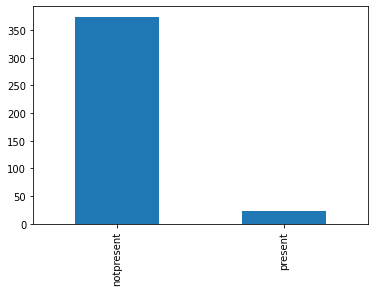

In [273]:
df['ba'].value_counts().plot.bar()

In [274]:
df['ba'].fillna('notpresent',inplace=True)

In [275]:
df['pcc'].isnull().sum()

0

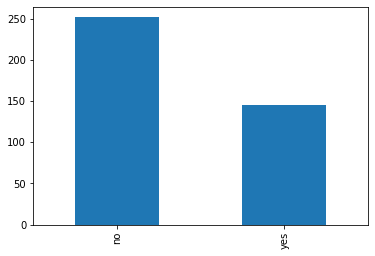

In [276]:
df['htn'].value_counts().plot.bar()

In [277]:
df['htn'].fillna('no',inplace=True)

In [278]:
df['htn'].isnull().sum()

0

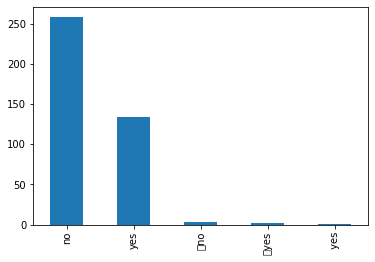

In [279]:
df['dm'].value_counts().plot.bar()

In [280]:
df.dm.unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [281]:
df.dm=df.dm.replace("\tno","no")
df.dm=df.dm.replace("\tyes","yes")

df.dm=df.dm.replace(" yes","yes")

In [282]:
df.dm.unique()

array(['yes', 'no', nan], dtype=object)

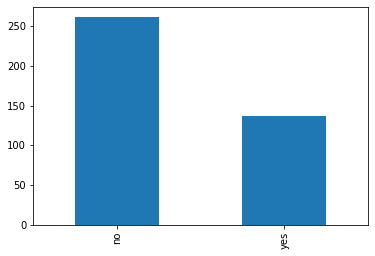

In [283]:
df['dm'].value_counts().plot.bar()

In [284]:
df['dm'].fillna('no',inplace=True)

In [285]:
df['dm'].isnull().sum()

0

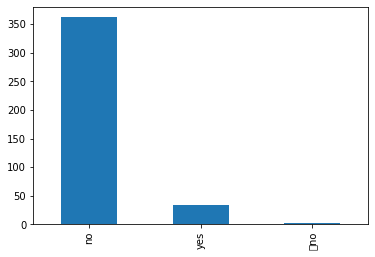

In [286]:
df['cad'].value_counts().plot.bar()

In [287]:
df.cad.unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [288]:
df.cad=df.cad.replace("\tno","no")

In [289]:
df['cad'].isnull().sum()

2

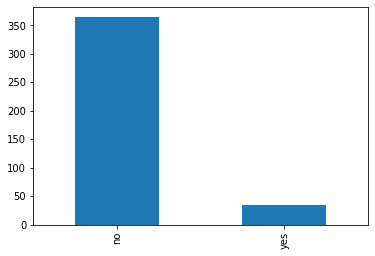

In [290]:
df['cad'].value_counts().plot.bar()

In [291]:
df['cad'].fillna('no',inplace=True)

In [292]:
df['cad'].isnull().sum()

0

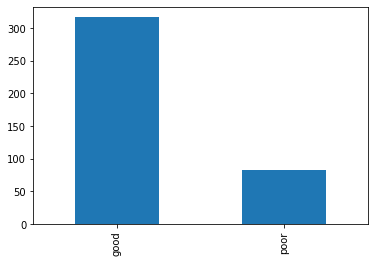

In [293]:
df['appet'].value_counts().plot.bar()

In [294]:
df['appet'].fillna('good',inplace=True)

In [295]:
df['appet'].isnull().sum()

0

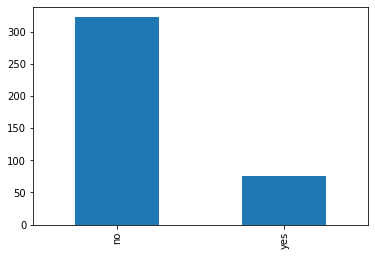

In [296]:
df['pe'].value_counts().plot.bar()

In [297]:
df['pe'].fillna('no',inplace=True)

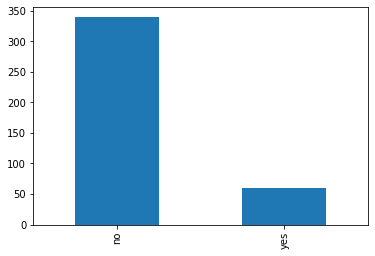

In [298]:
df['ane'].value_counts().plot.bar()

In [299]:
df['ane'].fillna('no',inplace=True)

In [300]:
df['ane'].isnull().sum()

0

In [301]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                 0
pc                 65
pcc                 0
ba                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [302]:
df_dummy=df.copy()

In [303]:
df_dummy=pd.get_dummies(df_dummy,drop_first=True)

In [304]:
df_dummy

id   age     bp  ...  pe_yes  ane_yes  classification_notckd
0      0  48.0   80.0  ...       0        0                      0
1      1   7.0   50.0  ...       0        0                      0
2      2  62.0   80.0  ...       0        1                      0
3      3  48.0   70.0  ...       1        1                      0
4      4  51.0   80.0  ...       0        0                      0
5      5  60.0   90.0  ...       1        0                      0
6      6  68.0   70.0  ...       0        0                      0
7      7  24.0    NaN  ...       1        0                      0
8      8  52.0  100.0  ...       0        1                      0
9      9  53.0   90.0  ...       0        1                      0
10    10  50.0   60.0  ...       0        1                      0
11    11  63.0   70.0  ...       1        0                      0
12    12  68.0   70.0  ...       1        0                      0
13    13  68.0   70.0  ...       1        0                      0
14    14  68.0   80.0  ...       1        0                      0
15    15  40.0   80.0  ...       0        1                      0
16    16  47.0   70.0  ...       0        0                      0
17    17  47.0   80.0  ...       0        0                      0
18    18  60.0  100.0  ...       0        0                      0
19    19  62.0   60.0  ...       0        0                      0
20    20  61.0   80.0  ...       1        1                      0
21    21  60.0   90.0  ...       0        0                      0
22    22  48.0   80.0  ...       0        1                      0
23    23  21.0   70.0  ...       0        1                      0
24    24  42.0  100.0  ...       0        0                      0
25    25  61.0   60.0  ...       0        1                      0
26    26  75.0   80.0  ...       0        0                      0
27    27  69.0   70.0  ...       1        0                      0
28    28  75.0   70.0  ...       0        0                      0
29    29  68.0   70.0  ...       0        0                      0
30    30   NaN   70.0  ...       0        0                      0
31    31  73.0   90.0  ...       0        0                      0
32    32  61.0   90.0  ...       0        0                      0
33    33  60.0  100.0  ...       0        0                      0
34    34  70.0   70.0  ...       0        0                      0
35    35  65.0   90.0  ...       0        1                      0
36    36  76.0   70.0  ...       0        0                      0
37    37  72.0   80.0  ...       0        1                      0
38    38  69.0   80.0  ...       0        0                      0
39    39  82.0   80.0  ...       0        0                      0
40    40  46.0   90.0  ...       0        0                      0
41    41  45.0   70.0  ...       1        0                      0
42    42  47.0  100.0  ...       0        1                      0
43    43  35.0   80.0  ...       0        0                      0
44    44  54.0   80.0  ...       1        0                      0
45    45  54.0   80.0  ...       1        0                      0
46    46  48.0   70.0  ...       0        0                      0
47    47  11.0   80.0  ...       0        0                      0
48    48  73.0   70.0  ...       1        0                      0
49    49  60.0   70.0  ...       0        1                      0
50    50  53.0   60.0  ...       1        1                      0
51    51  54.0  100.0  ...       1        0                      0
52    52  53.0   90.0  ...       0        1                      0
53    53  62.0   80.0  ...       0        0                      0
54    54  63.0   80.0  ...       0        0                      0
55    55  35.0   80.0  ...       1        0                      0
56    56  76.0   70.0  ...       1        0                      0
57    57  76.0   90.0  ...       0        0                      0
58    58  73.0   80.0  ...       0        0          

In [305]:
df_knnimputer=df_dummy.copy()

In [306]:
df_miceimputer=df_dummy.copy()

In [307]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [308]:
mice=IterativeImputer(random_state=162)

In [309]:
df_miceimputer.iloc[:,:]=mice.fit_transform(df_miceimputer)

In [310]:
df_miceimputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     400 non-null    float64
 1   age                    400 non-null    float64
 2   bp                     400 non-null    float64
 3   sg                     400 non-null    float64
 4   al                     400 non-null    float64
 5   su                     400 non-null    float64
 6   bgr                    400 non-null    float64
 7   bu                     400 non-null    float64
 8   sc                     400 non-null    float64
 9   sod                    400 non-null    float64
 10  pot                    400 non-null    float64
 11  hemo                   400 non-null    float64
 12  pcv                    400 non-null    float64
 13  wc                     400 non-null    float64
 14  rc                     400 non-null    float64
 15  rbc_no

In [311]:
df_miceimputer.isnull().sum()

id                       0
age                      0
bp                       0
sg                       0
al                       0
su                       0
bgr                      0
bu                       0
sc                       0
sod                      0
pot                      0
hemo                     0
pcv                      0
wc                       0
rc                       0
rbc_normal               0
pc_normal                0
pcc_present              0
ba_present               0
htn_yes                  0
dm_yes                   0
cad_yes                  0
appet_poor               0
pe_yes                   0
ane_yes                  0
classification_notckd    0
dtype: int64

In [312]:
df_miceimputer.head()

id   age    bp     sg  ...  appet_poor  pe_yes  ane_yes  classification_notckd
0  0.0  48.0  80.0  1.020  ...         0.0     0.0      0.0                    0.0
1  1.0   7.0  50.0  1.020  ...         0.0     0.0      0.0                    0.0
2  2.0  62.0  80.0  1.010  ...         1.0     0.0      1.0                    0.0
3  3.0  48.0  70.0  1.005  ...         1.0     1.0      1.0                    0.0
4  4.0  51.0  80.0  1.010  ...         0.0     0.0      0.0                    0.0

[5 rows x 26 columns]

In [313]:
pd.set_option('display.max_rows', 400)
display(df_miceimputer)

ValueError: ignored

TypeError: ignored

In [314]:
df_transform=df_miceimputer.copy()

In [315]:
X = df_miceimputer.iloc[:,0:25]  
y = df_miceimputer.iloc[:,-1] 

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((280, 25), (120, 25))

In [317]:
X_test

id        age          bp  ...  appet_poor  pe_yes  ane_yes
132  132.0  50.000000   81.981593  ...         0.0     1.0      1.0
309  309.0  51.000000   60.000000  ...         0.0     0.0      0.0
341  341.0  63.000000   70.000000  ...         0.0     0.0      0.0
196  196.0  49.000000  100.000000  ...         1.0     1.0      1.0
246  246.0  48.000000  110.000000  ...         0.0     0.0      1.0
60    60.0  67.000000   90.000000  ...         0.0     0.0      0.0
155  155.0  50.000000   70.000000  ...         0.0     0.0      0.0
261  261.0  49.000000   80.000000  ...         0.0     0.0      0.0
141  141.0  67.000000   70.000000  ...         0.0     0.0      1.0
214  214.0  68.000000   80.000000  ...         0.0     0.0      0.0
37    37.0  72.000000   80.000000  ...         1.0     0.0      1.0
134  134.0  47.000000  100.000000  ...         0.0     0.0      0.0
113  113.0  61.000000   90.000000  ...         1.0     0.0      1.0
348  348.0  38.000000   80.000000  ...         0.0     0.0      0.0
12    12.0  68.000000   70.000000  ...         1.0     1.0      0.0
59    59.0  59.000000  100.000000  ...         0.0     0.0      1.0
293  293.0  50.000000   72.984646  ...         0.0     0.0      0.0
140  140.0  69.000000   70.000000  ...         0.0     0.0      0.0
206  206.0  60.000000   70.000000  ...         0.0     0.0      0.0
199  199.0  65.000000   80.000000  ...         0.0     1.0      0.0
176  176.0  21.000000   90.000000  ...         0.0     0.0      1.0
268  268.0  47.843660   80.000000  ...         0.0     0.0      0.0
124  124.0  65.000000  100.000000  ...         0.0     0.0      0.0
344  344.0  64.000000   60.000000  ...         0.0     0.0      0.0
175  175.0  60.000000   50.000000  ...         0.0     0.0      0.0
313  313.0  55.000000   80.000000  ...         0.0     0.0      0.0
78    78.0  70.000000   80.000000  ...         0.0     1.0      0.0
15    15.0  40.000000   80.000000  ...         0.0     0.0      1.0
286  286.0  71.000000   70.000000  ...         0.0     0.0      0.0
102  102.0  17.000000   60.000000  ...         0.0     0.0      0.0
170  170.0  66.000000   70.000000  ...         0.0     0.0      0.0
303  303.0  55.000000   70.000000  ...         0.0     0.0      0.0
334  334.0  24.000000   80.000000  ...         0.0     0.0      0.0
225  225.0  60.000000   90.000000  ...         0.0     0.0      0.0
65    65.0  44.000000   90.000000  ...         0.0     0.0      0.0
76    76.0  48.000000   80.000000  ...         0.0     1.0      0.0
90    90.0  63.000000  100.000000  ...         0.0     0.0      0.0
173  173.0  17.000000   70.000000  ...         0.0     0.0      0.0
179  179.0  72.000000   90.000000  ...         0.0     0.0      0.0
399  399.0  58.000000   80.000000  ...         0.0     0.0      0.0
100  100.0  34.000000   70.000000  ...         0.0     1.0      0.0
322  322.0  70.000000   60.000000  ...         0.0     0.0      0.0
6      6.0  68.000000   70.000000  ...         0.0     0.0      0.0
1      1.0   7.000000   50.000000  ...         0.0     0.0      0.0
297  297.0  53.000000   60.000000  ...         0.0     0.0      0.0
54    54.0  63.000000   80.000000  ...         0.0     0.0      0.0
374  374.0  79.000000   80.000000  ...         0.0     0.0      0.0
255  255.0  34.000000   80.000000  ...         0.0     0.0      0.0
158  158.0  71.000000   60.000000  ...         0.0     0.0      0.0
233  233.0  51.000000  100.000000  ...         1.0     0.0      0.0
247  247.0  54.000000   90.000000  ...         1.0     1.0      1.0
144  144.0  60.000000   90.000000  ...         0.0     0.0      0.0
294  294.0  75.000000   60.000000  ...         0.0     0.0      0.0
171  171.0  83.000000   70.000000  ...         1.0     0.0      1.0
280  280.0  47.000000   80.000000  ...         0.0     0.0      0.0
318  318.0  61.000000   70.000000  ...         0.0     0.0      0.0
52    52.0  53.000000   90.000000  ...         1.0     0.0      1.0
10    10.0  50.000000   60.000000  ...         0.0     0.0      

In [318]:
from sklearn.preprocessing import MinMaxScaler

In [319]:
minmax_scale=MinMaxScaler()
# fit on the train dataset
minmax_scale.fit((X_train))
# transform the train dataset columns 
df_exp_minmax = minmax_scale.transform(X_train)
print(type(df_exp_minmax))
df_exp_minmax_new = pd.DataFrame(df_exp_minmax,columns=["id","age","bp","sg",	"al",	"su",	"bgr",	"bu","sc","sod","pot","hemo",	"pcv","wc",	"rc",	"rbc_normal",	"pc_normal",	"pcc_present","ba_present",	"htn_yes",	"dm_yes",	"cad_yes",	"appet_poor",	"pe_yes",	"ane_yes"])
df_exp_minmax_new

<class 'numpy.ndarray'>


id       age        bp  ...  appet_poor  pe_yes  ane_yes
0    0.231156  0.784091  0.153846  ...         0.0     0.0      0.0
1    0.560302  0.784091  0.307692  ...         0.0     0.0      0.0
2    0.587940  0.397727  0.384615  ...         0.0     0.0      0.0
3    0.582915  0.545455  0.307692  ...         0.0     1.0      0.0
4    0.947236  0.704545  0.153846  ...         0.0     0.0      0.0
5    0.356784  0.795455  0.307692  ...         0.0     0.0      0.0
6    0.055276  0.522727  0.230769  ...         0.0     0.0      1.0
7    0.633166  0.488636  0.230769  ...         0.0     0.0      0.0
8    0.879397  0.715909  0.153846  ...         0.0     0.0      0.0
9    0.422111  0.715909  0.153846  ...         0.0     0.0      0.0
10   0.376884  0.068182  0.076923  ...         1.0     1.0      0.0
11   0.987437  0.465909  0.076923  ...         0.0     0.0      0.0
12   0.165829  0.738636  0.153846  ...         0.0     1.0      0.0
13   0.603015  0.715909  0.153846  ...         1.0     1.0      0.0
14   0.547739  0.352273  0.307692  ...         0.0     0.0      0.0
15   0.253769  0.784091  0.307692  ...         0.0     0.0      0.0
16   0.781407  0.613636  0.076923  ...         0.0     0.0      0.0
17   0.487437  0.886364  0.153846  ...         0.0     0.0      0.0
18   0.819095  0.511364  0.076923  ...         0.0     0.0      0.0
19   0.042714  0.511364  0.230769  ...         1.0     0.0      0.0
20   0.412060  0.136364  0.204841  ...         1.0     1.0      0.0
21   0.467337  0.068182  0.000000  ...         0.0     1.0      0.0
22   0.075377  0.578088  0.153846  ...         0.0     0.0      0.0
23   0.286432  0.113636  0.076923  ...         0.0     0.0      0.0
24   0.660804  0.488636  0.230769  ...         0.0     0.0      0.0
25   0.258794  0.840909  0.153846  ...         1.0     1.0      1.0
26   0.899497  0.511364  0.076923  ...         0.0     0.0      0.0
27   0.615578  0.522727  0.384615  ...         1.0     0.0      0.0
28   0.590452  0.488636  0.153846  ...         0.0     0.0      1.0
29   0.291457  0.524872  0.153846  ...         0.0     1.0      0.0
30   0.829146  0.465909  0.230769  ...         0.0     0.0      0.0
31   0.301508  0.795455  0.307692  ...         1.0     0.0      0.0
32   0.726131  0.454545  0.153846  ...         0.0     0.0      0.0
33   0.281407  0.552761  0.076923  ...         0.0     0.0      0.0
34   0.540201  0.000000  0.189576  ...         0.0     1.0      0.0
35   0.341709  0.500000  0.307692  ...         0.0     0.0      0.0
36   0.690955  0.568182  0.230769  ...         0.0     0.0      0.0
37   0.316583  0.772727  0.307692  ...         1.0     1.0      0.0
38   0.497487  0.647727  0.384615  ...         1.0     1.0      0.0
39   0.751256  0.806818  0.076923  ...         0.0     0.0      0.0
40   0.706030  0.602273  0.230769  ...         0.0     0.0      0.0
41   0.334171  0.772727  0.384615  ...         0.0     0.0      0.0
42   0.082915  0.659091  0.384615  ...         1.0     0.0      0.0
43   0.949749  0.784091  0.076923  ...         0.0     0.0      0.0
44   0.407035  0.647727  0.153846  ...         0.0     0.0      0.0
45   0.085427  0.772727  0.153846  ...         1.0     0.0      0.0
46   0.580402  0.659091  0.307692  ...         0.0     1.0      0.0
47   0.243719  0.715909  0.076923  ...         1.0     1.0      0.0
48   0.213568  0.772727  0.153846  ...         1.0     1.0      0.0
49   0.153266  0.738636  0.230769  ...         0.0     1.0      0.0
50   0.419598  0.363636  0.153846  ...         1.0     0.0      0.0
51   0.708543  0.204545  0.153846  ...         0.0     0.0      0.0
52   0.502513  1.000000  0.307692  ...         0.0     0.0      0.0
53   0.982412  0.386364  0.230769  ...         0.0     0.0      0.0
54   0.577889  0.715909  0.076923  ...         1.0     0.0      0.0
55   0.721106  0.420455  0.153846  ...         0.0     0.0      0.0
56   0.271357  0.488636  0.230769  ...         0.0     0.0      0.0
57   0.115578  0.522727  0.153846  ...         0.0     0.0      0.0

In [320]:
X_test_minmax = minmax_scale.transform(X_test)
print(type(X_test_minmax))
df_test_minmax_new = pd.DataFrame(X_test_minmax,columns=["id","age","bp","sg",	"al",	"su",	"bgr",	"bu","sc","sod","pot","hemo",	"pcv","wc",	"rc",	"rbc_normal",	"pc_normal",	"pcc_present","ba_present",	"htn_yes",	"dm_yes",	"cad_yes",	"appet_poor",	"pe_yes",	"ane_yes"])
df_test_minmax_new

<class 'numpy.ndarray'>


id       age        bp  ...  appet_poor  pe_yes  ane_yes
0    0.331658  0.545455  0.246012  ...         0.0     1.0      1.0
1    0.776382  0.556818  0.076923  ...         0.0     0.0      0.0
2    0.856784  0.693182  0.153846  ...         0.0     0.0      0.0
3    0.492462  0.534091  0.384615  ...         1.0     1.0      1.0
4    0.618090  0.522727  0.461538  ...         0.0     0.0      1.0
5    0.150754  0.738636  0.307692  ...         0.0     0.0      0.0
6    0.389447  0.545455  0.153846  ...         0.0     0.0      0.0
7    0.655779  0.534091  0.230769  ...         0.0     0.0      0.0
8    0.354271  0.738636  0.153846  ...         0.0     0.0      1.0
9    0.537688  0.750000  0.230769  ...         0.0     0.0      0.0
10   0.092965  0.795455  0.230769  ...         1.0     0.0      1.0
11   0.336683  0.511364  0.384615  ...         0.0     0.0      0.0
12   0.283920  0.670455  0.307692  ...         1.0     0.0      1.0
13   0.874372  0.409091  0.230769  ...         0.0     0.0      0.0
14   0.030151  0.750000  0.153846  ...         1.0     1.0      0.0
15   0.148241  0.647727  0.384615  ...         0.0     0.0      1.0
16   0.736181  0.545455  0.176805  ...         0.0     0.0      0.0
17   0.351759  0.761364  0.153846  ...         0.0     0.0      0.0
18   0.517588  0.659091  0.153846  ...         0.0     0.0      0.0
19   0.500000  0.715909  0.230769  ...         0.0     1.0      0.0
20   0.442211  0.215909  0.307692  ...         0.0     0.0      1.0
21   0.673367  0.520951  0.230769  ...         0.0     0.0      0.0
22   0.311558  0.715909  0.384615  ...         0.0     0.0      0.0
23   0.864322  0.704545  0.076923  ...         0.0     0.0      0.0
24   0.439698  0.659091  0.000000  ...         0.0     0.0      0.0
25   0.786432  0.602273  0.230769  ...         0.0     0.0      0.0
26   0.195980  0.772727  0.230769  ...         0.0     1.0      0.0
27   0.037688  0.431818  0.230769  ...         0.0     0.0      1.0
28   0.718593  0.784091  0.153846  ...         0.0     0.0      0.0
29   0.256281  0.170455  0.076923  ...         0.0     0.0      0.0
30   0.427136  0.727273  0.153846  ...         0.0     0.0      0.0
31   0.761307  0.602273  0.153846  ...         0.0     0.0      0.0
32   0.839196  0.250000  0.230769  ...         0.0     0.0      0.0
33   0.565327  0.659091  0.307692  ...         0.0     0.0      0.0
34   0.163317  0.477273  0.307692  ...         0.0     0.0      0.0
35   0.190955  0.522727  0.230769  ...         0.0     1.0      0.0
36   0.226131  0.693182  0.384615  ...         0.0     0.0      0.0
37   0.434673  0.170455  0.153846  ...         0.0     0.0      0.0
38   0.449749  0.795455  0.307692  ...         0.0     0.0      0.0
39   1.002513  0.636364  0.230769  ...         0.0     0.0      0.0
40   0.251256  0.363636  0.153846  ...         0.0     1.0      0.0
41   0.809045  0.772727  0.076923  ...         0.0     0.0      0.0
42   0.015075  0.750000  0.153846  ...         0.0     0.0      0.0
43   0.002513  0.056818  0.000000  ...         0.0     0.0      0.0
44   0.746231  0.579545  0.076923  ...         0.0     0.0      0.0
45   0.135678  0.693182  0.230769  ...         0.0     0.0      0.0
46   0.939698  0.875000  0.230769  ...         0.0     0.0      0.0
47   0.640704  0.363636  0.230769  ...         0.0     0.0      0.0
48   0.396985  0.784091  0.076923  ...         0.0     0.0      0.0
49   0.585427  0.556818  0.384615  ...         1.0     0.0      0.0
50   0.620603  0.590909  0.307692  ...         1.0     1.0      1.0
51   0.361809  0.659091  0.307692  ...         0.0     0.0      0.0
52   0.738693  0.829545  0.076923  ...         0.0     0.0      0.0
53   0.429648  0.920455  0.153846  ...         1.0     0.0      1.0
54   0.703518  0.511364  0.230769  ...         0.0     0.0      0.0
55   0.798995  0.670455  0.153846  ...         0.0     0.0      0.0
56   0.130653  0.579545  0.307692  ...         1.0     0.0      1.0
57   0.025126  0.545455  0.076923  ...         0.0     0.0      1.0

In [321]:
x_train=df_exp_minmax_new

In [322]:
x_train

id       age        bp  ...  appet_poor  pe_yes  ane_yes
0    0.231156  0.784091  0.153846  ...         0.0     0.0      0.0
1    0.560302  0.784091  0.307692  ...         0.0     0.0      0.0
2    0.587940  0.397727  0.384615  ...         0.0     0.0      0.0
3    0.582915  0.545455  0.307692  ...         0.0     1.0      0.0
4    0.947236  0.704545  0.153846  ...         0.0     0.0      0.0
5    0.356784  0.795455  0.307692  ...         0.0     0.0      0.0
6    0.055276  0.522727  0.230769  ...         0.0     0.0      1.0
7    0.633166  0.488636  0.230769  ...         0.0     0.0      0.0
8    0.879397  0.715909  0.153846  ...         0.0     0.0      0.0
9    0.422111  0.715909  0.153846  ...         0.0     0.0      0.0
10   0.376884  0.068182  0.076923  ...         1.0     1.0      0.0
11   0.987437  0.465909  0.076923  ...         0.0     0.0      0.0
12   0.165829  0.738636  0.153846  ...         0.0     1.0      0.0
13   0.603015  0.715909  0.153846  ...         1.0     1.0      0.0
14   0.547739  0.352273  0.307692  ...         0.0     0.0      0.0
15   0.253769  0.784091  0.307692  ...         0.0     0.0      0.0
16   0.781407  0.613636  0.076923  ...         0.0     0.0      0.0
17   0.487437  0.886364  0.153846  ...         0.0     0.0      0.0
18   0.819095  0.511364  0.076923  ...         0.0     0.0      0.0
19   0.042714  0.511364  0.230769  ...         1.0     0.0      0.0
20   0.412060  0.136364  0.204841  ...         1.0     1.0      0.0
21   0.467337  0.068182  0.000000  ...         0.0     1.0      0.0
22   0.075377  0.578088  0.153846  ...         0.0     0.0      0.0
23   0.286432  0.113636  0.076923  ...         0.0     0.0      0.0
24   0.660804  0.488636  0.230769  ...         0.0     0.0      0.0
25   0.258794  0.840909  0.153846  ...         1.0     1.0      1.0
26   0.899497  0.511364  0.076923  ...         0.0     0.0      0.0
27   0.615578  0.522727  0.384615  ...         1.0     0.0      0.0
28   0.590452  0.488636  0.153846  ...         0.0     0.0      1.0
29   0.291457  0.524872  0.153846  ...         0.0     1.0      0.0
30   0.829146  0.465909  0.230769  ...         0.0     0.0      0.0
31   0.301508  0.795455  0.307692  ...         1.0     0.0      0.0
32   0.726131  0.454545  0.153846  ...         0.0     0.0      0.0
33   0.281407  0.552761  0.076923  ...         0.0     0.0      0.0
34   0.540201  0.000000  0.189576  ...         0.0     1.0      0.0
35   0.341709  0.500000  0.307692  ...         0.0     0.0      0.0
36   0.690955  0.568182  0.230769  ...         0.0     0.0      0.0
37   0.316583  0.772727  0.307692  ...         1.0     1.0      0.0
38   0.497487  0.647727  0.384615  ...         1.0     1.0      0.0
39   0.751256  0.806818  0.076923  ...         0.0     0.0      0.0
40   0.706030  0.602273  0.230769  ...         0.0     0.0      0.0
41   0.334171  0.772727  0.384615  ...         0.0     0.0      0.0
42   0.082915  0.659091  0.384615  ...         1.0     0.0      0.0
43   0.949749  0.784091  0.076923  ...         0.0     0.0      0.0
44   0.407035  0.647727  0.153846  ...         0.0     0.0      0.0
45   0.085427  0.772727  0.153846  ...         1.0     0.0      0.0
46   0.580402  0.659091  0.307692  ...         0.0     1.0      0.0
47   0.243719  0.715909  0.076923  ...         1.0     1.0      0.0
48   0.213568  0.772727  0.153846  ...         1.0     1.0      0.0
49   0.153266  0.738636  0.230769  ...         0.0     1.0      0.0
50   0.419598  0.363636  0.153846  ...         1.0     0.0      0.0
51   0.708543  0.204545  0.153846  ...         0.0     0.0      0.0
52   0.502513  1.000000  0.307692  ...         0.0     0.0      0.0
53   0.982412  0.386364  0.230769  ...         0.0     0.0      0.0
54   0.577889  0.715909  0.076923  ...         1.0     0.0      0.0
55   0.721106  0.420455  0.153846  ...         0.0     0.0      0.0
56   0.271357  0.488636  0.230769  ...         0.0     0.0      0.0
57   0.115578  0.522727  0.153846  ...         0.0     0.0      0.0

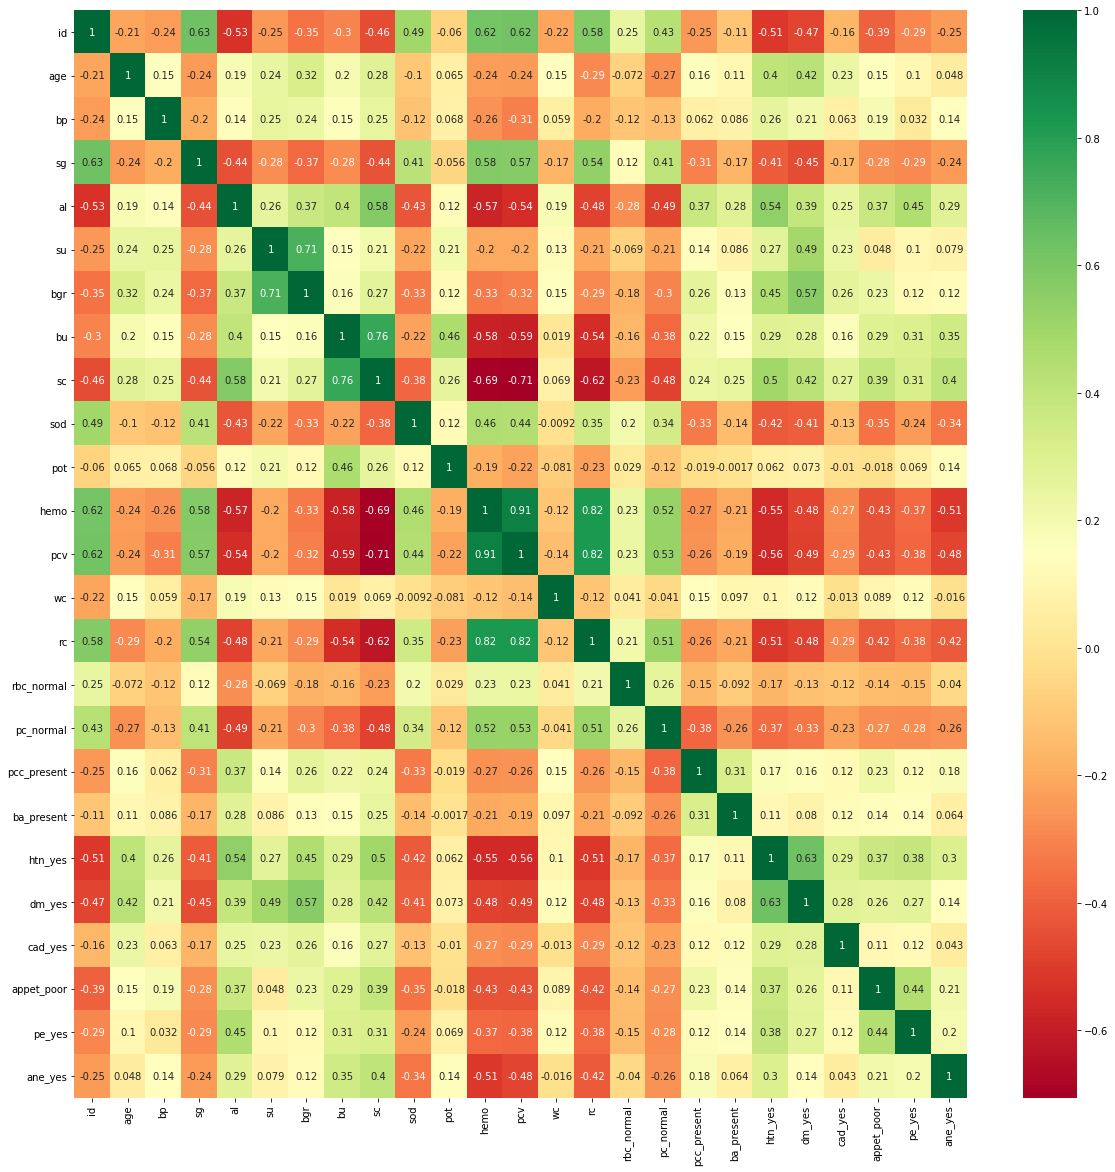

In [323]:
plt.figure(figsize=(20,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [324]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [325]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [326]:
corr_features

{'bgr', 'pcv', 'rc', 'sc'}

In [327]:
X_train

id        age          bp  ...  appet_poor  pe_yes  ane_yes
92    92.0  71.000000   70.000000  ...         0.0     0.0      0.0
223  223.0  71.000000   90.000000  ...         0.0     0.0      0.0
234  234.0  37.000000  100.000000  ...         0.0     0.0      0.0
232  232.0  50.000000   90.000000  ...         0.0     1.0      0.0
377  377.0  64.000000   70.000000  ...         0.0     0.0      0.0
142  142.0  72.000000   90.000000  ...         0.0     0.0      0.0
22    22.0  48.000000   80.000000  ...         0.0     0.0      1.0
252  252.0  45.000000   80.000000  ...         0.0     0.0      0.0
350  350.0  65.000000   70.000000  ...         0.0     0.0      0.0
168  168.0  65.000000   70.000000  ...         0.0     0.0      0.0
150  150.0   8.000000   60.000000  ...         1.0     1.0      0.0
393  393.0  43.000000   60.000000  ...         0.0     0.0      0.0
66    66.0  67.000000   70.000000  ...         0.0     1.0      0.0
240  240.0  65.000000   70.000000  ...         1.0     1.0      0.0
218  218.0  33.000000   90.000000  ...         0.0     0.0      0.0
101  101.0  71.000000   90.000000  ...         0.0     0.0      0.0
311  311.0  56.000000   60.000000  ...         0.0     0.0      0.0
194  194.0  80.000000   70.000000  ...         0.0     0.0      0.0
326  326.0  47.000000   60.000000  ...         0.0     0.0      0.0
17    17.0  47.000000   80.000000  ...         1.0     0.0      0.0
164  164.0  14.000000   76.629361  ...         1.0     1.0      0.0
186  186.0   8.000000   50.000000  ...         0.0     1.0      0.0
30    30.0  52.871785   70.000000  ...         0.0     0.0      0.0
114  114.0  12.000000   60.000000  ...         0.0     0.0      0.0
263  263.0  45.000000   80.000000  ...         0.0     0.0      0.0
103  103.0  76.000000   70.000000  ...         1.0     1.0      1.0
358  358.0  47.000000   60.000000  ...         0.0     0.0      0.0
245  245.0  48.000000  100.000000  ...         1.0     0.0      0.0
235  235.0  45.000000   70.000000  ...         0.0     0.0      1.0
116  116.0  48.188700   70.000000  ...         0.0     1.0      0.0
330  330.0  43.000000   80.000000  ...         0.0     0.0      0.0
120  120.0  72.000000   90.000000  ...         1.0     0.0      0.0
289  289.0  42.000000   70.000000  ...         0.0     0.0      0.0
112  112.0  50.642959   60.000000  ...         0.0     0.0      0.0
215  215.0   2.000000   74.644883  ...         0.0     1.0      0.0
136  136.0  46.000000   90.000000  ...         0.0     0.0      0.0
275  275.0  52.000000   80.000000  ...         0.0     0.0      0.0
126  126.0  70.000000   90.000000  ...         1.0     1.0      0.0
198  198.0  59.000000  100.000000  ...         1.0     1.0      0.0
299  299.0  73.000000   60.000000  ...         0.0     0.0      0.0
281  281.0  55.000000   80.000000  ...         0.0     0.0      0.0
133  133.0  70.000000  100.000000  ...         0.0     0.0      0.0
33    33.0  60.000000  100.000000  ...         1.0     0.0      0.0
378  378.0  71.000000   60.000000  ...         0.0     0.0      0.0
162  162.0  59.000000   70.000000  ...         0.0     0.0      0.0
34    34.0  70.000000   70.000000  ...         1.0     0.0      0.0
231  231.0  60.000000   90.000000  ...         0.0     1.0      0.0
97    97.0  65.000000   60.000000  ...         1.0     1.0      0.0
85    85.0  70.000000   70.000000  ...         1.0     1.0      0.0
61    61.0  67.000000   80.000000  ...         0.0     1.0      0.0
167  167.0  34.000000   70.000000  ...         1.0     0.0      0.0
282  282.0  20.000000   70.000000  ...         0.0     0.0      0.0
200  200.0  90.000000   90.000000  ...         0.0     0.0      0.0
391  391.0  36.000000   80.000000  ...         0.0     0.0      0.0
230  230.0  65.000000   60.000000  ...         1.0     0.0      0.0
287  287.0  39.000000   70.000000  ...         0.0     0.0      0.0
108  108.0  45.000000   80.000000  ...         0.0     0.0      0.0
46    46.0  48.000000   70.000000  ...         0.0     0.0      

In [328]:
X

id        age          bp  ...  appet_poor  pe_yes  ane_yes
0      0.0  48.000000   80.000000  ...         0.0     0.0      0.0
1      1.0   7.000000   50.000000  ...         0.0     0.0      0.0
2      2.0  62.000000   80.000000  ...         1.0     0.0      1.0
3      3.0  48.000000   70.000000  ...         1.0     1.0      1.0
4      4.0  51.000000   80.000000  ...         0.0     0.0      0.0
5      5.0  60.000000   90.000000  ...         0.0     1.0      0.0
6      6.0  68.000000   70.000000  ...         0.0     0.0      0.0
7      7.0  24.000000   82.293471  ...         0.0     1.0      0.0
8      8.0  52.000000  100.000000  ...         0.0     0.0      1.0
9      9.0  53.000000   90.000000  ...         1.0     0.0      1.0
10    10.0  50.000000   60.000000  ...         0.0     0.0      1.0
11    11.0  63.000000   70.000000  ...         1.0     1.0      0.0
12    12.0  68.000000   70.000000  ...         1.0     1.0      0.0
13    13.0  68.000000   70.000000  ...         1.0     1.0      0.0
14    14.0  68.000000   80.000000  ...         1.0     1.0      0.0
15    15.0  40.000000   80.000000  ...         0.0     0.0      1.0
16    16.0  47.000000   70.000000  ...         0.0     0.0      0.0
17    17.0  47.000000   80.000000  ...         1.0     0.0      0.0
18    18.0  60.000000  100.000000  ...         0.0     0.0      0.0
19    19.0  62.000000   60.000000  ...         0.0     0.0      0.0
20    20.0  61.000000   80.000000  ...         1.0     1.0      1.0
21    21.0  60.000000   90.000000  ...         0.0     0.0      0.0
22    22.0  48.000000   80.000000  ...         0.0     0.0      1.0
23    23.0  21.000000   70.000000  ...         1.0     0.0      1.0
24    24.0  42.000000  100.000000  ...         1.0     0.0      0.0
25    25.0  61.000000   60.000000  ...         0.0     0.0      1.0
26    26.0  75.000000   80.000000  ...         1.0     0.0      0.0
27    27.0  69.000000   70.000000  ...         0.0     1.0      0.0
28    28.0  75.000000   70.000000  ...         0.0     0.0      0.0
29    29.0  68.000000   70.000000  ...         0.0     0.0      0.0
30    30.0  52.871785   70.000000  ...         0.0     0.0      0.0
31    31.0  73.000000   90.000000  ...         1.0     0.0      0.0
32    32.0  61.000000   90.000000  ...         1.0     0.0      0.0
33    33.0  60.000000  100.000000  ...         1.0     0.0      0.0
34    34.0  70.000000   70.000000  ...         1.0     0.0      0.0
35    35.0  65.000000   90.000000  ...         1.0     0.0      1.0
36    36.0  76.000000   70.000000  ...         0.0     0.0      0.0
37    37.0  72.000000   80.000000  ...         1.0     0.0      1.0
38    38.0  69.000000   80.000000  ...         0.0     0.0      0.0
39    39.0  82.000000   80.000000  ...         0.0     0.0      0.0
40    40.0  46.000000   90.000000  ...         0.0     0.0      0.0
41    41.0  45.000000   70.000000  ...         0.0     1.0      0.0
42    42.0  47.000000  100.000000  ...         0.0     0.0      1.0
43    43.0  35.000000   80.000000  ...         0.0     0.0      0.0
44    44.0  54.000000   80.000000  ...         1.0     1.0      0.0
45    45.0  54.000000   80.000000  ...         1.0     1.0      0.0
46    46.0  48.000000   70.000000  ...         0.0     0.0      0.0
47    47.0  11.000000   80.000000  ...         0.0     0.0      0.0
48    48.0  73.000000   70.000000  ...         0.0     1.0      0.0
49    49.0  60.000000   70.000000  ...         1.0     0.0      1.0
50    50.0  53.000000   60.000000  ...         1.0     1.0      1.0
51    51.0  54.000000  100.000000  ...         1.0     1.0      0.0
52    52.0  53.000000   90.000000  ...         1.0     0.0      1.0
53    53.0  62.000000   80.000000  ...         0.0     0.0      0.0
54    54.0  63.000000   80.000000  ...         0.0     0.0      0.0
55    55.0  35.000000   80.000000  ...         0.0     1.0      0.0
56    56.0  76.000000   70.000000  ...         1.0     1.0      0.0
57    57.0  76.000000   90.000000  ...         1.0     0.0      

In [329]:
Xi=X.copy()

In [330]:
Xi

id        age          bp  ...  appet_poor  pe_yes  ane_yes
0      0.0  48.000000   80.000000  ...         0.0     0.0      0.0
1      1.0   7.000000   50.000000  ...         0.0     0.0      0.0
2      2.0  62.000000   80.000000  ...         1.0     0.0      1.0
3      3.0  48.000000   70.000000  ...         1.0     1.0      1.0
4      4.0  51.000000   80.000000  ...         0.0     0.0      0.0
5      5.0  60.000000   90.000000  ...         0.0     1.0      0.0
6      6.0  68.000000   70.000000  ...         0.0     0.0      0.0
7      7.0  24.000000   82.293471  ...         0.0     1.0      0.0
8      8.0  52.000000  100.000000  ...         0.0     0.0      1.0
9      9.0  53.000000   90.000000  ...         1.0     0.0      1.0
10    10.0  50.000000   60.000000  ...         0.0     0.0      1.0
11    11.0  63.000000   70.000000  ...         1.0     1.0      0.0
12    12.0  68.000000   70.000000  ...         1.0     1.0      0.0
13    13.0  68.000000   70.000000  ...         1.0     1.0      0.0
14    14.0  68.000000   80.000000  ...         1.0     1.0      0.0
15    15.0  40.000000   80.000000  ...         0.0     0.0      1.0
16    16.0  47.000000   70.000000  ...         0.0     0.0      0.0
17    17.0  47.000000   80.000000  ...         1.0     0.0      0.0
18    18.0  60.000000  100.000000  ...         0.0     0.0      0.0
19    19.0  62.000000   60.000000  ...         0.0     0.0      0.0
20    20.0  61.000000   80.000000  ...         1.0     1.0      1.0
21    21.0  60.000000   90.000000  ...         0.0     0.0      0.0
22    22.0  48.000000   80.000000  ...         0.0     0.0      1.0
23    23.0  21.000000   70.000000  ...         1.0     0.0      1.0
24    24.0  42.000000  100.000000  ...         1.0     0.0      0.0
25    25.0  61.000000   60.000000  ...         0.0     0.0      1.0
26    26.0  75.000000   80.000000  ...         1.0     0.0      0.0
27    27.0  69.000000   70.000000  ...         0.0     1.0      0.0
28    28.0  75.000000   70.000000  ...         0.0     0.0      0.0
29    29.0  68.000000   70.000000  ...         0.0     0.0      0.0
30    30.0  52.871785   70.000000  ...         0.0     0.0      0.0
31    31.0  73.000000   90.000000  ...         1.0     0.0      0.0
32    32.0  61.000000   90.000000  ...         1.0     0.0      0.0
33    33.0  60.000000  100.000000  ...         1.0     0.0      0.0
34    34.0  70.000000   70.000000  ...         1.0     0.0      0.0
35    35.0  65.000000   90.000000  ...         1.0     0.0      1.0
36    36.0  76.000000   70.000000  ...         0.0     0.0      0.0
37    37.0  72.000000   80.000000  ...         1.0     0.0      1.0
38    38.0  69.000000   80.000000  ...         0.0     0.0      0.0
39    39.0  82.000000   80.000000  ...         0.0     0.0      0.0
40    40.0  46.000000   90.000000  ...         0.0     0.0      0.0
41    41.0  45.000000   70.000000  ...         0.0     1.0      0.0
42    42.0  47.000000  100.000000  ...         0.0     0.0      1.0
43    43.0  35.000000   80.000000  ...         0.0     0.0      0.0
44    44.0  54.000000   80.000000  ...         1.0     1.0      0.0
45    45.0  54.000000   80.000000  ...         1.0     1.0      0.0
46    46.0  48.000000   70.000000  ...         0.0     0.0      0.0
47    47.0  11.000000   80.000000  ...         0.0     0.0      0.0
48    48.0  73.000000   70.000000  ...         0.0     1.0      0.0
49    49.0  60.000000   70.000000  ...         1.0     0.0      1.0
50    50.0  53.000000   60.000000  ...         1.0     1.0      1.0
51    51.0  54.000000  100.000000  ...         1.0     1.0      0.0
52    52.0  53.000000   90.000000  ...         1.0     0.0      1.0
53    53.0  62.000000   80.000000  ...         0.0     0.0      0.0
54    54.0  63.000000   80.000000  ...         0.0     0.0      0.0
55    55.0  35.000000   80.000000  ...         0.0     1.0      0.0
56    56.0  76.000000   70.000000  ...         1.0     1.0      0.0
57    57.0  76.000000   90.000000  ...         1.0     0.0      

In [331]:
X.drop(['rc'], axis = 1,inplace=True)

In [332]:

X.drop(['bgr'], axis = 1,inplace=True)
X.drop(['su'], axis = 1,inplace=True)


In [333]:
df_miceimputer


id        age          bp  ...  pe_yes  ane_yes  classification_notckd
0      0.0  48.000000   80.000000  ...     0.0      0.0                    0.0
1      1.0   7.000000   50.000000  ...     0.0      0.0                    0.0
2      2.0  62.000000   80.000000  ...     0.0      1.0                    0.0
3      3.0  48.000000   70.000000  ...     1.0      1.0                    0.0
4      4.0  51.000000   80.000000  ...     0.0      0.0                    0.0
5      5.0  60.000000   90.000000  ...     1.0      0.0                    0.0
6      6.0  68.000000   70.000000  ...     0.0      0.0                    0.0
7      7.0  24.000000   82.293471  ...     1.0      0.0                    0.0
8      8.0  52.000000  100.000000  ...     0.0      1.0                    0.0
9      9.0  53.000000   90.000000  ...     0.0      1.0                    0.0
10    10.0  50.000000   60.000000  ...     0.0      1.0                    0.0
11    11.0  63.000000   70.000000  ...     1.0      0.0                    0.0
12    12.0  68.000000   70.000000  ...     1.0      0.0                    0.0
13    13.0  68.000000   70.000000  ...     1.0      0.0                    0.0
14    14.0  68.000000   80.000000  ...     1.0      0.0                    0.0
15    15.0  40.000000   80.000000  ...     0.0      1.0                    0.0
16    16.0  47.000000   70.000000  ...     0.0      0.0                    0.0
17    17.0  47.000000   80.000000  ...     0.0      0.0                    0.0
18    18.0  60.000000  100.000000  ...     0.0      0.0                    0.0
19    19.0  62.000000   60.000000  ...     0.0      0.0                    0.0
20    20.0  61.000000   80.000000  ...     1.0      1.0                    0.0
21    21.0  60.000000   90.000000  ...     0.0      0.0                    0.0
22    22.0  48.000000   80.000000  ...     0.0      1.0                    0.0
23    23.0  21.000000   70.000000  ...     0.0      1.0                    0.0
24    24.0  42.000000  100.000000  ...     0.0      0.0                    0.0
25    25.0  61.000000   60.000000  ...     0.0      1.0                    0.0
26    26.0  75.000000   80.000000  ...     0.0      0.0                    0.0
27    27.0  69.000000   70.000000  ...     1.0      0.0                    0.0
28    28.0  75.000000   70.000000  ...     0.0      0.0                    0.0
29    29.0  68.000000   70.000000  ...     0.0      0.0                    0.0
30    30.0  52.871785   70.000000  ...     0.0      0.0                    0.0
31    31.0  73.000000   90.000000  ...     0.0      0.0                    0.0
32    32.0  61.000000   90.000000  ...     0.0      0.0                    0.0
33    33.0  60.000000  100.000000  ...     0.0      0.0                    0.0
34    34.0  70.000000   70.000000  ...     0.0      0.0                    0.0
35    35.0  65.000000   90.000000  ...     0.0      1.0                    0.0
36    36.0  76.000000   70.000000  ...     0.0      0.0                    0.0
37    37.0  72.000000   80.000000  ...     0.0      1.0                    0.0
38    38.0  69.000000   80.000000  ...     0.0      0.0                    0.0
39    39.0  82.000000   80.000000  ...     0.0      0.0                    0.0
40    40.0  46.000000   90.000000  ...     0.0      0.0                    0.0
41    41.0  45.000000   70.000000  ...     1.0      0.0                    0.0
42    42.0  47.000000  100.000000  ...     0.0      1.0                    0.0
43    43.0  35.000000   80.000000  ...     0.0      0.0                    0.0
44    44.0  54.000000   80.000000  ...     1.0      0.0                    0.0
45    45.0  54.000000   80.000000  ...     1.0      0.0                    0.0
46    46.0  48.000000   70.000000  ...     0.0      0.0                    0.0
47    47.0  11.000000   80.000000  ...     0.0      0.0                    0.0
48    48.0  73.000000   70.000000  ...     1.0      0.0                    0.0
49    49.0  60.000000   70.000000  ...     0.0      1.0   

In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((280, 22), (120, 22))

In [335]:
X_train

id        age          bp  ...  appet_poor  pe_yes  ane_yes
92    92.0  71.000000   70.000000  ...         0.0     0.0      0.0
223  223.0  71.000000   90.000000  ...         0.0     0.0      0.0
234  234.0  37.000000  100.000000  ...         0.0     0.0      0.0
232  232.0  50.000000   90.000000  ...         0.0     1.0      0.0
377  377.0  64.000000   70.000000  ...         0.0     0.0      0.0
142  142.0  72.000000   90.000000  ...         0.0     0.0      0.0
22    22.0  48.000000   80.000000  ...         0.0     0.0      1.0
252  252.0  45.000000   80.000000  ...         0.0     0.0      0.0
350  350.0  65.000000   70.000000  ...         0.0     0.0      0.0
168  168.0  65.000000   70.000000  ...         0.0     0.0      0.0
150  150.0   8.000000   60.000000  ...         1.0     1.0      0.0
393  393.0  43.000000   60.000000  ...         0.0     0.0      0.0
66    66.0  67.000000   70.000000  ...         0.0     1.0      0.0
240  240.0  65.000000   70.000000  ...         1.0     1.0      0.0
218  218.0  33.000000   90.000000  ...         0.0     0.0      0.0
101  101.0  71.000000   90.000000  ...         0.0     0.0      0.0
311  311.0  56.000000   60.000000  ...         0.0     0.0      0.0
194  194.0  80.000000   70.000000  ...         0.0     0.0      0.0
326  326.0  47.000000   60.000000  ...         0.0     0.0      0.0
17    17.0  47.000000   80.000000  ...         1.0     0.0      0.0
164  164.0  14.000000   76.629361  ...         1.0     1.0      0.0
186  186.0   8.000000   50.000000  ...         0.0     1.0      0.0
30    30.0  52.871785   70.000000  ...         0.0     0.0      0.0
114  114.0  12.000000   60.000000  ...         0.0     0.0      0.0
263  263.0  45.000000   80.000000  ...         0.0     0.0      0.0
103  103.0  76.000000   70.000000  ...         1.0     1.0      1.0
358  358.0  47.000000   60.000000  ...         0.0     0.0      0.0
245  245.0  48.000000  100.000000  ...         1.0     0.0      0.0
235  235.0  45.000000   70.000000  ...         0.0     0.0      1.0
116  116.0  48.188700   70.000000  ...         0.0     1.0      0.0
330  330.0  43.000000   80.000000  ...         0.0     0.0      0.0
120  120.0  72.000000   90.000000  ...         1.0     0.0      0.0
289  289.0  42.000000   70.000000  ...         0.0     0.0      0.0
112  112.0  50.642959   60.000000  ...         0.0     0.0      0.0
215  215.0   2.000000   74.644883  ...         0.0     1.0      0.0
136  136.0  46.000000   90.000000  ...         0.0     0.0      0.0
275  275.0  52.000000   80.000000  ...         0.0     0.0      0.0
126  126.0  70.000000   90.000000  ...         1.0     1.0      0.0
198  198.0  59.000000  100.000000  ...         1.0     1.0      0.0
299  299.0  73.000000   60.000000  ...         0.0     0.0      0.0
281  281.0  55.000000   80.000000  ...         0.0     0.0      0.0
133  133.0  70.000000  100.000000  ...         0.0     0.0      0.0
33    33.0  60.000000  100.000000  ...         1.0     0.0      0.0
378  378.0  71.000000   60.000000  ...         0.0     0.0      0.0
162  162.0  59.000000   70.000000  ...         0.0     0.0      0.0
34    34.0  70.000000   70.000000  ...         1.0     0.0      0.0
231  231.0  60.000000   90.000000  ...         0.0     1.0      0.0
97    97.0  65.000000   60.000000  ...         1.0     1.0      0.0
85    85.0  70.000000   70.000000  ...         1.0     1.0      0.0
61    61.0  67.000000   80.000000  ...         0.0     1.0      0.0
167  167.0  34.000000   70.000000  ...         1.0     0.0      0.0
282  282.0  20.000000   70.000000  ...         0.0     0.0      0.0
200  200.0  90.000000   90.000000  ...         0.0     0.0      0.0
391  391.0  36.000000   80.000000  ...         0.0     0.0      0.0
230  230.0  65.000000   60.000000  ...         1.0     0.0      0.0
287  287.0  39.000000   70.000000  ...         0.0     0.0      0.0
108  108.0  45.000000   80.000000  ...         0.0     0.0      0.0
46    46.0  48.000000   70.000000  ...         0.0     0.0      

In [336]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [337]:
y_pred = model.predict(X_test)

In [338]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.accuracy_score(y_train,model.predict(X_train)))

MAE: 0.0
R2 score: 1.0
1.0
0.9928571428571429


In [339]:
def draw_cm(actual, predicted ):
  cm = confusion_matrix(actual, predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

[[72  0]
 [ 0 48]]


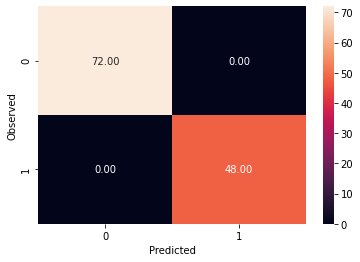

None


In [340]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [341]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        72
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [342]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(random_state=0,n_estimators= 500,max_depth=8) 
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [343]:
y_pred = clf.predict(X_test)

In [344]:

print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.0
R2 score: 1.0
Accuracy score for test data 1.0


In [345]:

from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=3) 
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [346]:

y_pred = neigh.predict(X_test)

In [347]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(X_train)))

MAE: 0.041666666666666664
R2 score: 0.826388888888889
Accuracy score for test data 0.9583333333333334
Accuracy score for train data 0.9928571428571429


In [348]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [349]:
y_pred = model.predict(X_test)

In [350]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(X_train)))

MAE: 0.025
R2 score: 0.8958333333333334
Accuracy score for test data 0.975
Accuracy score for train data 0.9714285714285714


In [351]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500) 
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [352]:
hy_pred = mlp.predict(X_test)

In [353]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(X_train)))

MAE: 0.025
R2 score: 0.8958333333333334
Accuracy score for test data 0.975
Accuracy score for train data 0.9714285714285714


In [354]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [355]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,clf.predict(X_train)))

MAE: 0.0
R2 score: 1.0
Accuracy score for test data 1.0
Accuracy score for train data 1.0


In [356]:
ckd_stage=df_miceimputer[df_miceimputer['classification_notckd']==0]

In [357]:
ckd_stage

id        age          bp  ...  pe_yes  ane_yes  classification_notckd
0      0.0  48.000000   80.000000  ...     0.0      0.0                    0.0
1      1.0   7.000000   50.000000  ...     0.0      0.0                    0.0
2      2.0  62.000000   80.000000  ...     0.0      1.0                    0.0
3      3.0  48.000000   70.000000  ...     1.0      1.0                    0.0
4      4.0  51.000000   80.000000  ...     0.0      0.0                    0.0
5      5.0  60.000000   90.000000  ...     1.0      0.0                    0.0
6      6.0  68.000000   70.000000  ...     0.0      0.0                    0.0
7      7.0  24.000000   82.293471  ...     1.0      0.0                    0.0
8      8.0  52.000000  100.000000  ...     0.0      1.0                    0.0
9      9.0  53.000000   90.000000  ...     0.0      1.0                    0.0
10    10.0  50.000000   60.000000  ...     0.0      1.0                    0.0
11    11.0  63.000000   70.000000  ...     1.0      0.0                    0.0
12    12.0  68.000000   70.000000  ...     1.0      0.0                    0.0
13    13.0  68.000000   70.000000  ...     1.0      0.0                    0.0
14    14.0  68.000000   80.000000  ...     1.0      0.0                    0.0
15    15.0  40.000000   80.000000  ...     0.0      1.0                    0.0
16    16.0  47.000000   70.000000  ...     0.0      0.0                    0.0
17    17.0  47.000000   80.000000  ...     0.0      0.0                    0.0
18    18.0  60.000000  100.000000  ...     0.0      0.0                    0.0
19    19.0  62.000000   60.000000  ...     0.0      0.0                    0.0
20    20.0  61.000000   80.000000  ...     1.0      1.0                    0.0
21    21.0  60.000000   90.000000  ...     0.0      0.0                    0.0
22    22.0  48.000000   80.000000  ...     0.0      1.0                    0.0
23    23.0  21.000000   70.000000  ...     0.0      1.0                    0.0
24    24.0  42.000000  100.000000  ...     0.0      0.0                    0.0
25    25.0  61.000000   60.000000  ...     0.0      1.0                    0.0
26    26.0  75.000000   80.000000  ...     0.0      0.0                    0.0
27    27.0  69.000000   70.000000  ...     1.0      0.0                    0.0
28    28.0  75.000000   70.000000  ...     0.0      0.0                    0.0
29    29.0  68.000000   70.000000  ...     0.0      0.0                    0.0
30    30.0  52.871785   70.000000  ...     0.0      0.0                    0.0
31    31.0  73.000000   90.000000  ...     0.0      0.0                    0.0
32    32.0  61.000000   90.000000  ...     0.0      0.0                    0.0
33    33.0  60.000000  100.000000  ...     0.0      0.0                    0.0
34    34.0  70.000000   70.000000  ...     0.0      0.0                    0.0
35    35.0  65.000000   90.000000  ...     0.0      1.0                    0.0
36    36.0  76.000000   70.000000  ...     0.0      0.0                    0.0
37    37.0  72.000000   80.000000  ...     0.0      1.0                    0.0
38    38.0  69.000000   80.000000  ...     0.0      0.0                    0.0
39    39.0  82.000000   80.000000  ...     0.0      0.0                    0.0
40    40.0  46.000000   90.000000  ...     0.0      0.0                    0.0
41    41.0  45.000000   70.000000  ...     1.0      0.0                    0.0
42    42.0  47.000000  100.000000  ...     0.0      1.0                    0.0
43    43.0  35.000000   80.000000  ...     0.0      0.0                    0.0
44    44.0  54.000000   80.000000  ...     1.0      0.0                    0.0
45    45.0  54.000000   80.000000  ...     1.0      0.0                    0.0
46    46.0  48.000000   70.000000  ...     0.0      0.0                    0.0
47    47.0  11.000000   80.000000  ...     0.0      0.0                    0.0
48    48.0  73.000000   70.000000  ...     1.0      0.0                    0.0
49    49.0  60.000000   70.000000  ...     0.0      1.0   

In [358]:
X = ckd_stage.iloc[:,0:25]  
y = ckd_stage.iloc[:,-1]

In [359]:
X

id        age          bp  ...  appet_poor  pe_yes  ane_yes
0      0.0  48.000000   80.000000  ...         0.0     0.0      0.0
1      1.0   7.000000   50.000000  ...         0.0     0.0      0.0
2      2.0  62.000000   80.000000  ...         1.0     0.0      1.0
3      3.0  48.000000   70.000000  ...         1.0     1.0      1.0
4      4.0  51.000000   80.000000  ...         0.0     0.0      0.0
5      5.0  60.000000   90.000000  ...         0.0     1.0      0.0
6      6.0  68.000000   70.000000  ...         0.0     0.0      0.0
7      7.0  24.000000   82.293471  ...         0.0     1.0      0.0
8      8.0  52.000000  100.000000  ...         0.0     0.0      1.0
9      9.0  53.000000   90.000000  ...         1.0     0.0      1.0
10    10.0  50.000000   60.000000  ...         0.0     0.0      1.0
11    11.0  63.000000   70.000000  ...         1.0     1.0      0.0
12    12.0  68.000000   70.000000  ...         1.0     1.0      0.0
13    13.0  68.000000   70.000000  ...         1.0     1.0      0.0
14    14.0  68.000000   80.000000  ...         1.0     1.0      0.0
15    15.0  40.000000   80.000000  ...         0.0     0.0      1.0
16    16.0  47.000000   70.000000  ...         0.0     0.0      0.0
17    17.0  47.000000   80.000000  ...         1.0     0.0      0.0
18    18.0  60.000000  100.000000  ...         0.0     0.0      0.0
19    19.0  62.000000   60.000000  ...         0.0     0.0      0.0
20    20.0  61.000000   80.000000  ...         1.0     1.0      1.0
21    21.0  60.000000   90.000000  ...         0.0     0.0      0.0
22    22.0  48.000000   80.000000  ...         0.0     0.0      1.0
23    23.0  21.000000   70.000000  ...         1.0     0.0      1.0
24    24.0  42.000000  100.000000  ...         1.0     0.0      0.0
25    25.0  61.000000   60.000000  ...         0.0     0.0      1.0
26    26.0  75.000000   80.000000  ...         1.0     0.0      0.0
27    27.0  69.000000   70.000000  ...         0.0     1.0      0.0
28    28.0  75.000000   70.000000  ...         0.0     0.0      0.0
29    29.0  68.000000   70.000000  ...         0.0     0.0      0.0
30    30.0  52.871785   70.000000  ...         0.0     0.0      0.0
31    31.0  73.000000   90.000000  ...         1.0     0.0      0.0
32    32.0  61.000000   90.000000  ...         1.0     0.0      0.0
33    33.0  60.000000  100.000000  ...         1.0     0.0      0.0
34    34.0  70.000000   70.000000  ...         1.0     0.0      0.0
35    35.0  65.000000   90.000000  ...         1.0     0.0      1.0
36    36.0  76.000000   70.000000  ...         0.0     0.0      0.0
37    37.0  72.000000   80.000000  ...         1.0     0.0      1.0
38    38.0  69.000000   80.000000  ...         0.0     0.0      0.0
39    39.0  82.000000   80.000000  ...         0.0     0.0      0.0
40    40.0  46.000000   90.000000  ...         0.0     0.0      0.0
41    41.0  45.000000   70.000000  ...         0.0     1.0      0.0
42    42.0  47.000000  100.000000  ...         0.0     0.0      1.0
43    43.0  35.000000   80.000000  ...         0.0     0.0      0.0
44    44.0  54.000000   80.000000  ...         1.0     1.0      0.0
45    45.0  54.000000   80.000000  ...         1.0     1.0      0.0
46    46.0  48.000000   70.000000  ...         0.0     0.0      0.0
47    47.0  11.000000   80.000000  ...         0.0     0.0      0.0
48    48.0  73.000000   70.000000  ...         0.0     1.0      0.0
49    49.0  60.000000   70.000000  ...         1.0     0.0      1.0
50    50.0  53.000000   60.000000  ...         1.0     1.0      1.0
51    51.0  54.000000  100.000000  ...         1.0     1.0      0.0
52    52.0  53.000000   90.000000  ...         1.0     0.0      1.0
53    53.0  62.000000   80.000000  ...         0.0     0.0      0.0
54    54.0  63.000000   80.000000  ...         0.0     0.0      0.0
55    55.0  35.000000   80.000000  ...         0.0     1.0      0.0
56    56.0  76.000000   70.000000  ...         1.0     1.0      0.0
57    57.0  76.000000   90.000000  ...         1.0     0.0      

In [360]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
66     0.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0

In [361]:

X['Raised_power_value sc'] = np.power((X['sc']),-1.154)

X['Raised_power_value age'] = np.power((X['age']),-0.203)

In [362]:
X['gfr']=(175*X['Raised_power_value sc']*X['sg'])

def stage(X):
  if (X['gfr']>90):
     return 1;
  elif ((X['gfr']>60) & (X['gfr']<=90)):
      return 2;
  elif ((X['gfr']>30) & (X['gfr']<=60)):
      return 3;
  elif ((X['gfr']>15) & (X['gfr']<=30)):
     return 4;
  elif (X['gfr']<=15):
     return 5;
X['stage']= X.apply(lambda X:stage(X),axis=1)


In [363]:
X

id        age          bp  ...  Raised_power_value age         gfr  stage
0      0.0  48.000000   80.000000  ...                0.455730  144.631557      1
1      1.0   7.000000   50.000000  ...                0.673667  230.925757      1
2      2.0  62.000000   80.000000  ...                0.432658   89.696387      2
3      3.0  48.000000   70.000000  ...                0.455730   37.681991      3
4      4.0  51.000000   80.000000  ...                0.450156  119.874738      1
5      5.0  60.000000   90.000000  ...                0.435547  159.124456      1
6      6.0  68.000000   70.000000  ...                0.424620   23.960480      4
7      7.0  24.000000   82.293471  ...                0.524587  159.124456      1
8      8.0  52.000000  100.000000  ...                0.448385   84.688109      2
9      9.0  53.000000   90.000000  ...                0.446655   24.197712      4
10    10.0  50.000000   60.000000  ...                0.451969   35.692929      3
11    11.0  63.000000   70.000000  ...                0.431255   56.177918      3
12    12.0  68.000000   70.000000  ...                0.424620   75.450657      2
13    13.0  68.000000   70.000000  ...                0.424620   30.462306      3
14    14.0  68.000000   80.000000  ...                0.424620   34.690204      3
15    15.0  40.000000   80.000000  ...                0.472914   24.079096      4
16    16.0  47.000000   70.000000  ...                0.457682   71.506960      2
17    17.0  47.000000   80.000000  ...                0.457682   26.471797      4
18    18.0  60.000000  100.000000  ...                0.435547  132.516905      1
19    19.0  62.000000   60.000000  ...                0.432658  103.264163      1
20    20.0  61.000000   80.000000  ...                0.434088   36.933081      3
21    21.0  60.000000   90.000000  ...                0.435547   23.863748      4
22    22.0  48.000000   80.000000  ...                0.455730   24.316329      4
23    23.0  21.000000   70.000000  ...                0.539001   67.415276      2
24    24.0  42.000000  100.000000  ...                0.468253  120.468177      1
25    25.0  61.000000   60.000000  ...                0.434088   85.522475      2
26    26.0  75.000000   80.000000  ...                0.416258   64.675578      2
27    27.0  69.000000   70.000000  ...                0.423364   56.177918      3
28    28.0  75.000000   70.000000  ...                0.416258  120.183973      1
29    29.0  68.000000   70.000000  ...                0.424620  119.281298      1
30    30.0  52.871785   70.000000  ...                0.446874   24.009523      4
31    31.0  73.000000   90.000000  ...                0.418548  111.248657      1
32    32.0  61.000000   90.000000  ...                0.434088  110.700634      1
33    33.0  60.000000  100.000000  ...                0.435547   62.003392      2
34    34.0  70.000000   70.000000  ...                0.422129   26.368873      4
35    35.0  65.000000   90.000000  ...                0.428527   80.213895      2
36    36.0  76.000000   70.000000  ...                0.415140   90.140429      1
37    37.0  72.000000   80.000000  ...                0.419722   43.202305      3
38    38.0  69.000000   80.000000  ...                0.423364   35.033671      3
39    39.0  82.000000   80.000000  ...                0.408786   43.055908      3
40    40.0  46.000000   90.000000  ...                0.459685   75.078979      2
41    41.0  45.000000   70.000000  ...                0.461740  266.757282      1
42    42.0  47.000000  100.000000  ...                0.457682  176.750000      1
43    43.0  35.000000   80.000000  ...                0.485908   23.960480      4
44    44.0  54.000000   80.000000  ...                0.444963   23.960480      4
45    45.0  54.000000   80.000000  ...                0.444963   24.197712      4
46    46.0  48.000000   70.000000  ...                0.455730  143.922579      1
47    47.0  11.000000   80.000000  ...                0.614607  228.6617

In [364]:
X.size

7250

In [365]:
X.shape

(250, 29)

In [366]:
X.info

<bound method DataFrame.info of         id        age          bp  ...  Raised_power_value age         gfr  stage
0      0.0  48.000000   80.000000  ...                0.455730  144.631557      1
1      1.0   7.000000   50.000000  ...                0.673667  230.925757      1
2      2.0  62.000000   80.000000  ...                0.432658   89.696387      2
3      3.0  48.000000   70.000000  ...                0.455730   37.681991      3
4      4.0  51.000000   80.000000  ...                0.450156  119.874738      1
5      5.0  60.000000   90.000000  ...                0.435547  159.124456      1
6      6.0  68.000000   70.000000  ...                0.424620   23.960480      4
7      7.0  24.000000   82.293471  ...                0.524587  159.124456      1
8      8.0  52.000000  100.000000  ...                0.448385   84.688109      2
9      9.0  53.000000   90.000000  ...                0.446655   24.197712      4
10    10.0  50.000000   60.000000  ...                0.451969   3

In [367]:
X.drop(['Raised_power_value sc','Raised_power_value age'],axis=1, inplace=True)

In [368]:
X

id        age          bp        sg  ...  pe_yes  ane_yes         gfr  stage
0      0.0  48.000000   80.000000  1.020000  ...     0.0      0.0  144.631557      1
1      1.0   7.000000   50.000000  1.020000  ...     0.0      0.0  230.925757      1
2      2.0  62.000000   80.000000  1.010000  ...     0.0      1.0   89.696387      2
3      3.0  48.000000   70.000000  1.005000  ...     1.0      1.0   37.681991      3
4      4.0  51.000000   80.000000  1.010000  ...     0.0      0.0  119.874738      1
5      5.0  60.000000   90.000000  1.015000  ...     1.0      0.0  159.124456      1
6      6.0  68.000000   70.000000  1.010000  ...     0.0      0.0   23.960480      4
7      7.0  24.000000   82.293471  1.015000  ...     1.0      0.0  159.124456      1
8      8.0  52.000000  100.000000  1.015000  ...     0.0      1.0   84.688109      2
9      9.0  53.000000   90.000000  1.020000  ...     0.0      1.0   24.197712      4
10    10.0  50.000000   60.000000  1.010000  ...     0.0      1.0   35.692929      3
11    11.0  63.000000   70.000000  1.010000  ...     1.0      0.0   56.177918      3
12    12.0  68.000000   70.000000  1.015000  ...     1.0      0.0   75.450657      2
13    13.0  68.000000   70.000000  1.012855  ...     1.0      0.0   30.462306      3
14    14.0  68.000000   80.000000  1.010000  ...     1.0      0.0   34.690204      3
15    15.0  40.000000   80.000000  1.015000  ...     0.0      1.0   24.079096      4
16    16.0  47.000000   70.000000  1.015000  ...     0.0      0.0   71.506960      2
17    17.0  47.000000   80.000000  1.013942  ...     0.0      0.0   26.471797      4
18    18.0  60.000000  100.000000  1.025000  ...     0.0      0.0  132.516905      1
19    19.0  62.000000   60.000000  1.015000  ...     0.0      0.0  103.264163      1
20    20.0  61.000000   80.000000  1.015000  ...     1.0      1.0   36.933081      3
21    21.0  60.000000   90.000000  1.005922  ...     0.0      0.0   23.863748      4
22    22.0  48.000000   80.000000  1.025000  ...     0.0      1.0   24.316329      4
23    23.0  21.000000   70.000000  1.010000  ...     0.0      1.0   67.415276      2
24    24.0  42.000000  100.000000  1.015000  ...     0.0      0.0  120.468177      1
25    25.0  61.000000   60.000000  1.025000  ...     0.0      1.0   85.522475      2
26    26.0  75.000000   80.000000  1.015000  ...     0.0      0.0   64.675578      2
27    27.0  69.000000   70.000000  1.010000  ...     1.0      0.0   56.177918      3
28    28.0  75.000000   70.000000  1.012605  ...     0.0      0.0  120.183973      1
29    29.0  68.000000   70.000000  1.005000  ...     0.0      0.0  119.281298      1
30    30.0  52.871785   70.000000  1.012067  ...     0.0      0.0   24.009523      4
31    31.0  73.000000   90.000000  1.015000  ...     0.0      0.0  111.248657      1
32    32.0  61.000000   90.000000  1.010000  ...     0.0      0.0  110.700634      1
33    33.0  60.000000  100.000000  1.020000  ...     0.0      0.0   62.003392      2
34    34.0  70.000000   70.000000  1.010000  ...     0.0      0.0   26.368873      4
35    35.0  65.000000   90.000000  1.020000  ...     0.0      1.0   80.213895      2
36    36.0  76.000000   70.000000  1.015000  ...     0.0      0.0   90.140429      1
37    37.0  72.000000   80.000000  1.013434  ...     0.0      1.0   43.202305      3
38    38.0  69.000000   80.000000  1.020000  ...     0.0      0.0   35.033671      3
39    39.0  82.000000   80.000000  1.010000  ...     0.0      0.0   43.055908      3
40    40.0  46.000000   90.000000  1.010000  ...     0.0      0.0   75.078979      2
41    41.0  45.000000   70.000000  1.010000  ...     1.0      0.0  266.757282      1
42    42.0  47.000000  100.000000  1.010000  ...     0.0      1.0  176.750000      1
43    43.0  35.000000   80.000000  1.010000  ...     0.0      0.0   23.960480      4
44    44.0  54.000000   80.000000  1.010000  ...     1.0      0.0   23.960480      4
45    45.0  54.000000   80.000000  1.020000  ...     1.0      0.0   24.197712      4
46    46.0  4

In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['age','sg','al','sc','hemo','rbc_normal','pc_normal','sc',	'sod',	'pot','pcv','ba_present','htn_yes','dm_yes','wc','pcc_present','appet_poor','cad_yes','pe_yes','ane_yes','gfr']],X['stage'], test_size=0.3)

In [370]:

X_train

age        sg        al  ...  pe_yes  ane_yes         gfr
144  60.000000  1.010000  2.000000  ...     0.0      0.0   67.596701
30   52.871785  1.012067  2.134138  ...     0.0      0.0   24.009523
94   65.000000  1.010000  0.000000  ...     0.0      0.0  102.755473
249  56.000000  1.010000  4.000000  ...     1.0      1.0   23.960480
120  72.000000  1.025000  1.000000  ...     0.0      0.0   72.211462
26   75.000000  1.015000  0.000000  ...     0.0      0.0   64.675578
40   46.000000  1.010000  2.000000  ...     0.0      0.0   75.078979
136  46.000000  1.020000  1.363536  ...     0.0      0.0   54.402374
90   63.000000  1.010000  2.000000  ...     0.0      0.0   46.176004
236  65.000000  1.015986  1.803960  ...     1.0      0.0   79.898241
122  34.000000  1.012789  2.407811  ...     0.0      1.0   24.026650
149  65.000000  1.020000  1.000000  ...     1.0      0.0  178.500000
73   53.437179  1.015000  2.000000  ...     1.0      1.0   24.079096
217  63.000000  1.010000  1.000000  ...     0.0      0.0   89.696387
210  59.000000  1.015000  4.000000  ...     0.0      1.0   24.079096
9    53.000000  1.020000  2.000000  ...     0.0      1.0   24.197712
212  40.000000  1.015000  3.000000  ...     1.0      0.0   24.079096
213  55.000000  1.010000  3.000000  ...     1.0      0.0   36.751144
200  90.000000  1.025000  1.000000  ...     0.0      0.0   50.485189
215   2.000000  1.010000  3.000000  ...     1.0      0.0   81.007252
161  62.000000  1.015000  3.000000  ...     0.0      0.0   82.283417
66   67.000000  1.020000  2.000000  ...     1.0      0.0  103.772854
129  75.000000  1.025000  1.000000  ...     1.0      0.0  121.655055
11   63.000000  1.010000  3.000000  ...     1.0      0.0   56.177918
88   58.000000  1.010000  4.000000  ...     0.0      0.0   71.154709
108  45.000000  1.015000  0.000000  ...     0.0      0.0  177.625000
211  54.000000  1.015000  0.000000  ...     0.0      0.0  143.922579
19   62.000000  1.015000  1.000000  ...     0.0      0.0  103.264163
199  65.000000  1.015000  0.000000  ...     1.0      0.0  111.248657
128  52.000000  1.015000  4.000000  ...     0.0      1.0   24.327367
2    62.000000  1.010000  2.000000  ...     0.0      1.0   89.696387
168  65.000000  1.015000  4.000000  ...     0.0      0.0  111.248657
106  50.000000  1.011577  2.465669  ...     1.0      1.0   23.997903
192  46.000000  1.015000  0.000000  ...     0.0      0.0  200.589518
201  64.000000  1.013739  2.442880  ...     1.0      1.0   24.049190
218  33.000000  1.015000  0.000000  ...     0.0      0.0  229.793768
25   61.000000  1.025000  0.000000  ...     0.0      1.0   85.522475
93   73.000000  1.010000  3.000000  ...     0.0      0.0   24.207528
44   54.000000  1.010000  3.000000  ...     1.0      0.0   23.960480
6    68.000000  1.010000  0.000000  ...     0.0      0.0   23.960480
181  45.000000  1.025000  2.000000  ...     0.0      0.0   72.211462
18   60.000000  1.025000  0.000000  ...     0.0      0.0  132.516905
57   76.000000  1.013278  1.682915  ...     0.0      0.0   24.038247
28   75.000000  1.012605  1.000000  ...     0.0      0.0  120.183973
3    48.000000  1.005000  4.000000  ...     1.0      1.0   37.681991
14   68.000000  1.010000  3.000000  ...     1.0      0.0   34.690204
54   63.000000  1.010000  2.000000  ...     0.0      0.0   43.055908
247  54.000000  1.025000  1.000000  ...     1.0      1.0  145.340536
86   56.000000  1.012501  1.199059  ...     0.0      0.0   84.479604
158  71.000000  1.020000  3.000000  ...     0.0      0.0  111.796680
139  41.000000  1.015000  2.000000  ...     1.0      1.0   54.135696
55   35.000000  1.005000  3.000000  ...     1.0      0.0   41.304976
242  69.000000  1.010000  4.000000  ...     1.0      1.0   23.960480
92   71.000000  1.010000  3.000000  ...     0.0      0.0   40.307544
179  72.000000  1.010000  2.000000  ...     0.0      0.0   67.596701
16   47.000000  1.015000  2.000000  ...     0.0      0.0   71.506960
48   73.000000  1.005000  0.000000  ...     1.0      0.0  198.613267
243  62.0

In [371]:

y_train

144    2
30     4
94     1
249    4
120    2
26     2
40     2
136    3
90     3
236    2
122    4
149    1
73     4
217    2
210    4
9      4
212    4
213    3
200    3
215    2
161    2
66     1
129    1
11     3
88     2
108    1
211    1
19     1
199    1
128    4
2      2
168    1
106    4
192    1
201    4
218    1
25     2
93     4
44     4
6      4
181    2
18     1
57     4
28     1
3      3
14     3
54     3
247    1
86     2
158    1
139    3
55     3
242    4
92     3
179    2
16     2
48     1
243    2
17     4
126    3
193    4
71     3
233    1
145    4
75     1
219    2
187    1
234    1
156    3
153    4
38     3
205    2
97     2
244    3
117    1
83     1
146    1
148    4
125    2
114    1
74     4
196    4
72     1
133    4
132    4
43     4
50     3
24     1
63     4
45     4
130    4
21     4
240    1
56     4
121    1
222    1
13     3
186    1
76     4
140    1
147    1
10     3
109    2
89     1
195    3
152    1
110    2
62     1
159    1
166    3
154    4
2

In [372]:
X_test

age        sg        al  ...  pe_yes  ane_yes         gfr
209  19.000000  1.020000  0.000000  ...     0.0      0.0   96.837800
37   72.000000  1.013434  1.283870  ...     0.0      1.0   43.202305
46   48.000000  1.015000  0.000000  ...     0.0      0.0  143.922579
116  48.188700  1.015000  4.000000  ...     1.0      0.0  395.268955
111  65.000000  1.010000  3.000000  ...     0.0      0.0   31.975330
100  34.000000  1.015000  4.000000  ...     1.0      0.0  200.589518
226  64.000000  1.015000  4.000000  ...     1.0      0.0   24.079096
87   70.000000  1.005000  1.000000  ...     0.0      0.0   51.475055
182  61.000000  1.020000  0.000000  ...     0.0      0.0  230.925757
67   45.000000  1.020000  3.000000  ...     0.0      0.0   55.700545
143  41.000000  1.015000  1.000000  ...     0.0      0.0   24.079096
155  50.000000  1.020000  3.000000  ...     0.0      0.0   90.584470
98   50.000000  1.012421  1.534586  ...     0.0      1.0   24.017905
104  55.000000  1.014879  1.924101  ...     1.0      0.0   79.811137
69   26.000000  1.015000  0.000000  ...     0.0      0.0  159.124456
123  43.000000  1.015000  2.000000  ...     0.0      0.0  159.124456
7    24.000000  1.015000  2.000000  ...     1.0      0.0  159.124456
31   73.000000  1.015000  3.000000  ...     0.0      0.0  111.248657
80   74.000000  1.010000  0.000000  ...     0.0      0.0   53.869017
239  34.000000  1.015000  2.000000  ...     0.0      0.0  103.264163
150   8.000000  1.025000  3.000000  ...     1.0      0.0  202.565770
131   5.000000  1.010000  0.000000  ...     0.0      0.0  318.693261
138  73.000000  1.010000  1.000000  ...     0.0      0.0  102.755473
84   59.000000  1.010000  3.000000  ...     1.0      1.0   23.960480
49   60.000000  1.010000  2.000000  ...     0.0      1.0   49.746381
162  59.000000  1.013512  1.145619  ...     0.0      0.0  111.085573
112  50.642959  1.015000  3.000000  ...     0.0      0.0  143.922579
184  54.000000  1.015000  3.000000  ...     1.0      0.0   44.785663
101  71.000000  1.015000  2.000000  ...     0.0      0.0   32.133624
180  73.000000  1.010000  1.000000  ...     0.0      0.0   84.270926
79   56.000000  1.010000  1.000000  ...     1.0      0.0   89.696387
119  60.000000  1.010000  0.000000  ...     0.0      0.0  143.213601
228  60.000000  1.016901  1.423031  ...     0.0      0.0   61.815039
137  45.000000  1.010000  2.000000  ...     0.0      0.0   35.692929
177  65.000000  1.015000  2.000000  ...     0.0      0.0   61.699454
163  46.000000  1.010000  0.000000  ...     0.0      1.0   79.427484
113  61.000000  1.015000  0.000000  ...     0.0      1.0   57.224374
1     7.000000  1.020000  4.000000  ...     0.0      0.0  230.925757
35   65.000000  1.020000  2.000000  ...     0.0      1.0   80.213895
172  62.000000  1.010000  1.000000  ...     0.0      0.0   51.731150
20   61.000000  1.015000  2.000000  ...     1.0      1.0   36.933081
77   67.000000  1.010000  1.000000  ...     1.0      0.0   46.176004
124  65.000000  1.015000  0.000000  ...     0.0      0.0   61.699454
58   73.000000  1.020000  2.000000  ...     0.0      0.0   30.677198
221  66.000000  1.020000  1.000000  ...     0.0      0.0   96.760959
171  83.000000  1.020000  3.000000  ...     0.0      1.0   59.259636
167  34.000000  1.020000  0.000000  ...     0.0      0.0  201.577644
91   56.000000  1.015000  4.000000  ...     0.0      0.0   96.286641
135  48.000000  1.015000  0.000000  ...     0.0      0.0  131.224058
22   48.000000  1.025000  4.000000  ...     0.0      1.0   24.316329
51   54.000000  1.015000  3.000000  ...     1.0      0.0  103.264163
34   70.000000  1.010000  1.000000  ...     0.0      0.0   26.368873
142  72.000000  1.012988  1.292793  ...     0.0      0.0   24.031356
115  47.000000  1.010000  0.000000  ...     0.0      1.0  199.601392
190   6.000000  1.010000  4.000000  ...     0.0      0.0  176.750000
173  17.000000  1.015000  1.000000  ...     0.0      0.0   24.079096
95   62.000000  1.015000  1.000000  ...     1.0      1.0  159.124456
82   38.0

In [373]:
y_test

209    1
37     3
46     1
116    1
111    3
100    1
226    4
87     3
182    1
67     3
143    4
155    1
98     4
104    2
69     1
123    1
7      1
31     1
80     3
239    1
150    1
131    1
138    1
84     4
49     3
162    1
112    1
184    3
101    3
180    2
79     2
119    1
228    2
137    3
177    2
163    2
113    3
1      1
35     2
172    3
20     3
77     3
124    2
58     3
221    1
171    3
167    1
91     1
135    1
22     4
51     1
34     4
142    4
115    1
190    1
173    4
95     1
82     2
102    2
241    1
96     3
208    1
39     3
42     1
189    3
118    1
151    1
36     1
68     3
170    1
248    1
246    4
206    3
141    4
225    3
Name: stage, dtype: int64

In [374]:
from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=120)
mymodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [375]:
mymodel.predict(X_test)

array([1, 3, 1, 1, 4, 1, 4, 3, 1, 2, 4, 1, 4, 2, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 4, 3, 1, 1, 3, 4, 2, 2, 1, 2, 3, 2, 2, 3, 1, 2, 3, 3, 3, 2, 4,
       1, 3, 1, 2, 1, 4, 1, 4, 4, 1, 1, 4, 1, 2, 2, 1, 3, 1, 3, 1, 4, 1,
       1, 2, 3, 1, 1, 4, 3, 4, 3])

In [376]:
X_test

age        sg        al  ...  pe_yes  ane_yes         gfr
209  19.000000  1.020000  0.000000  ...     0.0      0.0   96.837800
37   72.000000  1.013434  1.283870  ...     0.0      1.0   43.202305
46   48.000000  1.015000  0.000000  ...     0.0      0.0  143.922579
116  48.188700  1.015000  4.000000  ...     1.0      0.0  395.268955
111  65.000000  1.010000  3.000000  ...     0.0      0.0   31.975330
100  34.000000  1.015000  4.000000  ...     1.0      0.0  200.589518
226  64.000000  1.015000  4.000000  ...     1.0      0.0   24.079096
87   70.000000  1.005000  1.000000  ...     0.0      0.0   51.475055
182  61.000000  1.020000  0.000000  ...     0.0      0.0  230.925757
67   45.000000  1.020000  3.000000  ...     0.0      0.0   55.700545
143  41.000000  1.015000  1.000000  ...     0.0      0.0   24.079096
155  50.000000  1.020000  3.000000  ...     0.0      0.0   90.584470
98   50.000000  1.012421  1.534586  ...     0.0      1.0   24.017905
104  55.000000  1.014879  1.924101  ...     1.0      0.0   79.811137
69   26.000000  1.015000  0.000000  ...     0.0      0.0  159.124456
123  43.000000  1.015000  2.000000  ...     0.0      0.0  159.124456
7    24.000000  1.015000  2.000000  ...     1.0      0.0  159.124456
31   73.000000  1.015000  3.000000  ...     0.0      0.0  111.248657
80   74.000000  1.010000  0.000000  ...     0.0      0.0   53.869017
239  34.000000  1.015000  2.000000  ...     0.0      0.0  103.264163
150   8.000000  1.025000  3.000000  ...     1.0      0.0  202.565770
131   5.000000  1.010000  0.000000  ...     0.0      0.0  318.693261
138  73.000000  1.010000  1.000000  ...     0.0      0.0  102.755473
84   59.000000  1.010000  3.000000  ...     1.0      1.0   23.960480
49   60.000000  1.010000  2.000000  ...     0.0      1.0   49.746381
162  59.000000  1.013512  1.145619  ...     0.0      0.0  111.085573
112  50.642959  1.015000  3.000000  ...     0.0      0.0  143.922579
184  54.000000  1.015000  3.000000  ...     1.0      0.0   44.785663
101  71.000000  1.015000  2.000000  ...     0.0      0.0   32.133624
180  73.000000  1.010000  1.000000  ...     0.0      0.0   84.270926
79   56.000000  1.010000  1.000000  ...     1.0      0.0   89.696387
119  60.000000  1.010000  0.000000  ...     0.0      0.0  143.213601
228  60.000000  1.016901  1.423031  ...     0.0      0.0   61.815039
137  45.000000  1.010000  2.000000  ...     0.0      0.0   35.692929
177  65.000000  1.015000  2.000000  ...     0.0      0.0   61.699454
163  46.000000  1.010000  0.000000  ...     0.0      1.0   79.427484
113  61.000000  1.015000  0.000000  ...     0.0      1.0   57.224374
1     7.000000  1.020000  4.000000  ...     0.0      0.0  230.925757
35   65.000000  1.020000  2.000000  ...     0.0      1.0   80.213895
172  62.000000  1.010000  1.000000  ...     0.0      0.0   51.731150
20   61.000000  1.015000  2.000000  ...     1.0      1.0   36.933081
77   67.000000  1.010000  1.000000  ...     1.0      0.0   46.176004
124  65.000000  1.015000  0.000000  ...     0.0      0.0   61.699454
58   73.000000  1.020000  2.000000  ...     0.0      0.0   30.677198
221  66.000000  1.020000  1.000000  ...     0.0      0.0   96.760959
171  83.000000  1.020000  3.000000  ...     0.0      1.0   59.259636
167  34.000000  1.020000  0.000000  ...     0.0      0.0  201.577644
91   56.000000  1.015000  4.000000  ...     0.0      0.0   96.286641
135  48.000000  1.015000  0.000000  ...     0.0      0.0  131.224058
22   48.000000  1.025000  4.000000  ...     0.0      1.0   24.316329
51   54.000000  1.015000  3.000000  ...     1.0      0.0  103.264163
34   70.000000  1.010000  1.000000  ...     0.0      0.0   26.368873
142  72.000000  1.012988  1.292793  ...     0.0      0.0   24.031356
115  47.000000  1.010000  0.000000  ...     0.0      1.0  199.601392
190   6.000000  1.010000  4.000000  ...     0.0      0.0  176.750000
173  17.000000  1.015000  1.000000  ...     0.0      0.0   24.079096
95   62.000000  1.015000  1.000000  ...     1.0      1.0  159.124456
82   38.0

In [377]:

mymodel.score(X_test, y_test)

0.9066666666666666

In [378]:
predicted_output = mymodel.predict(X_test)
predicted_output

array([1, 3, 1, 1, 4, 1, 4, 3, 1, 2, 4, 1, 4, 2, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 4, 3, 1, 1, 3, 4, 2, 2, 1, 2, 3, 2, 2, 3, 1, 2, 3, 3, 3, 2, 4,
       1, 3, 1, 2, 1, 4, 1, 4, 4, 1, 1, 4, 1, 2, 2, 1, 3, 1, 3, 1, 4, 1,
       1, 2, 3, 1, 1, 4, 3, 4, 3])

In [379]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[32,  2,  0,  0],
       [ 0, 10,  0,  0],
       [ 0,  1, 16,  4],
       [ 0,  0,  0, 10]])

Text(24.0, 0.5, 'Truth or Actual Value')

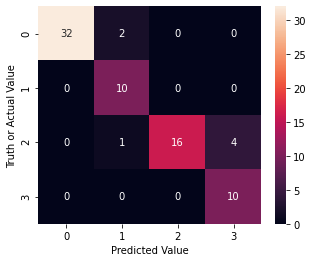

In [380]:

import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [381]:
model=svm.SVC(C=1,kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [382]:
model.score(X_test, y_test)

0.9733333333333334

In [383]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3,random_state=42)

In [384]:

tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [385]:
y_pred = tree.predict(X_test)

In [386]:

y_pred

array([1, 3, 1, 1, 3, 1, 4, 3, 1, 3, 4, 1, 4, 2, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 4, 3, 1, 1, 3, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 2, 3, 3, 3, 2, 3,
       1, 2, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 2, 2, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 3, 1, 1, 4, 3, 4, 3])

In [387]:
tree.score(X_test, y_test)

0.9866666666666667

In [388]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  0,  0,  0],
       [ 0, 10,  0,  0],
       [ 0,  1, 20,  0],
       [ 0,  0,  0, 10]])

In [389]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.accuracy_score(y_train,tree.predict(X_train)))

MAE: 0.013333333333333334
R2 score: 0.9894007914075749
0.9866666666666667
1.0


In [390]:
X

id        age          bp        sg  ...  pe_yes  ane_yes         gfr  stage
0      0.0  48.000000   80.000000  1.020000  ...     0.0      0.0  144.631557      1
1      1.0   7.000000   50.000000  1.020000  ...     0.0      0.0  230.925757      1
2      2.0  62.000000   80.000000  1.010000  ...     0.0      1.0   89.696387      2
3      3.0  48.000000   70.000000  1.005000  ...     1.0      1.0   37.681991      3
4      4.0  51.000000   80.000000  1.010000  ...     0.0      0.0  119.874738      1
5      5.0  60.000000   90.000000  1.015000  ...     1.0      0.0  159.124456      1
6      6.0  68.000000   70.000000  1.010000  ...     0.0      0.0   23.960480      4
7      7.0  24.000000   82.293471  1.015000  ...     1.0      0.0  159.124456      1
8      8.0  52.000000  100.000000  1.015000  ...     0.0      1.0   84.688109      2
9      9.0  53.000000   90.000000  1.020000  ...     0.0      1.0   24.197712      4
10    10.0  50.000000   60.000000  1.010000  ...     0.0      1.0   35.692929      3
11    11.0  63.000000   70.000000  1.010000  ...     1.0      0.0   56.177918      3
12    12.0  68.000000   70.000000  1.015000  ...     1.0      0.0   75.450657      2
13    13.0  68.000000   70.000000  1.012855  ...     1.0      0.0   30.462306      3
14    14.0  68.000000   80.000000  1.010000  ...     1.0      0.0   34.690204      3
15    15.0  40.000000   80.000000  1.015000  ...     0.0      1.0   24.079096      4
16    16.0  47.000000   70.000000  1.015000  ...     0.0      0.0   71.506960      2
17    17.0  47.000000   80.000000  1.013942  ...     0.0      0.0   26.471797      4
18    18.0  60.000000  100.000000  1.025000  ...     0.0      0.0  132.516905      1
19    19.0  62.000000   60.000000  1.015000  ...     0.0      0.0  103.264163      1
20    20.0  61.000000   80.000000  1.015000  ...     1.0      1.0   36.933081      3
21    21.0  60.000000   90.000000  1.005922  ...     0.0      0.0   23.863748      4
22    22.0  48.000000   80.000000  1.025000  ...     0.0      1.0   24.316329      4
23    23.0  21.000000   70.000000  1.010000  ...     0.0      1.0   67.415276      2
24    24.0  42.000000  100.000000  1.015000  ...     0.0      0.0  120.468177      1
25    25.0  61.000000   60.000000  1.025000  ...     0.0      1.0   85.522475      2
26    26.0  75.000000   80.000000  1.015000  ...     0.0      0.0   64.675578      2
27    27.0  69.000000   70.000000  1.010000  ...     1.0      0.0   56.177918      3
28    28.0  75.000000   70.000000  1.012605  ...     0.0      0.0  120.183973      1
29    29.0  68.000000   70.000000  1.005000  ...     0.0      0.0  119.281298      1
30    30.0  52.871785   70.000000  1.012067  ...     0.0      0.0   24.009523      4
31    31.0  73.000000   90.000000  1.015000  ...     0.0      0.0  111.248657      1
32    32.0  61.000000   90.000000  1.010000  ...     0.0      0.0  110.700634      1
33    33.0  60.000000  100.000000  1.020000  ...     0.0      0.0   62.003392      2
34    34.0  70.000000   70.000000  1.010000  ...     0.0      0.0   26.368873      4
35    35.0  65.000000   90.000000  1.020000  ...     0.0      1.0   80.213895      2
36    36.0  76.000000   70.000000  1.015000  ...     0.0      0.0   90.140429      1
37    37.0  72.000000   80.000000  1.013434  ...     0.0      1.0   43.202305      3
38    38.0  69.000000   80.000000  1.020000  ...     0.0      0.0   35.033671      3
39    39.0  82.000000   80.000000  1.010000  ...     0.0      0.0   43.055908      3
40    40.0  46.000000   90.000000  1.010000  ...     0.0      0.0   75.078979      2
41    41.0  45.000000   70.000000  1.010000  ...     1.0      0.0  266.757282      1
42    42.0  47.000000  100.000000  1.010000  ...     0.0      1.0  176.750000      1
43    43.0  35.000000   80.000000  1.010000  ...     0.0      0.0   23.960480      4
44    44.0  54.000000   80.000000  1.010000  ...     1.0      0.0   23.960480      4
45    45.0  54.000000   80.000000  1.020000  ...     1.0      0.0   24.197712      4
46    46.0  4

In [391]:
def pot(X):
  if (X['pot']<3.5):
     return 3.5;
  else:
    return X['pot'];
  
X['pot']= X.apply(lambda X:pot(X),axis=1)


In [392]:
X

id        age          bp        sg  ...  pe_yes  ane_yes         gfr  stage
0      0.0  48.000000   80.000000  1.020000  ...     0.0      0.0  144.631557      1
1      1.0   7.000000   50.000000  1.020000  ...     0.0      0.0  230.925757      1
2      2.0  62.000000   80.000000  1.010000  ...     0.0      1.0   89.696387      2
3      3.0  48.000000   70.000000  1.005000  ...     1.0      1.0   37.681991      3
4      4.0  51.000000   80.000000  1.010000  ...     0.0      0.0  119.874738      1
5      5.0  60.000000   90.000000  1.015000  ...     1.0      0.0  159.124456      1
6      6.0  68.000000   70.000000  1.010000  ...     0.0      0.0   23.960480      4
7      7.0  24.000000   82.293471  1.015000  ...     1.0      0.0  159.124456      1
8      8.0  52.000000  100.000000  1.015000  ...     0.0      1.0   84.688109      2
9      9.0  53.000000   90.000000  1.020000  ...     0.0      1.0   24.197712      4
10    10.0  50.000000   60.000000  1.010000  ...     0.0      1.0   35.692929      3
11    11.0  63.000000   70.000000  1.010000  ...     1.0      0.0   56.177918      3
12    12.0  68.000000   70.000000  1.015000  ...     1.0      0.0   75.450657      2
13    13.0  68.000000   70.000000  1.012855  ...     1.0      0.0   30.462306      3
14    14.0  68.000000   80.000000  1.010000  ...     1.0      0.0   34.690204      3
15    15.0  40.000000   80.000000  1.015000  ...     0.0      1.0   24.079096      4
16    16.0  47.000000   70.000000  1.015000  ...     0.0      0.0   71.506960      2
17    17.0  47.000000   80.000000  1.013942  ...     0.0      0.0   26.471797      4
18    18.0  60.000000  100.000000  1.025000  ...     0.0      0.0  132.516905      1
19    19.0  62.000000   60.000000  1.015000  ...     0.0      0.0  103.264163      1
20    20.0  61.000000   80.000000  1.015000  ...     1.0      1.0   36.933081      3
21    21.0  60.000000   90.000000  1.005922  ...     0.0      0.0   23.863748      4
22    22.0  48.000000   80.000000  1.025000  ...     0.0      1.0   24.316329      4
23    23.0  21.000000   70.000000  1.010000  ...     0.0      1.0   67.415276      2
24    24.0  42.000000  100.000000  1.015000  ...     0.0      0.0  120.468177      1
25    25.0  61.000000   60.000000  1.025000  ...     0.0      1.0   85.522475      2
26    26.0  75.000000   80.000000  1.015000  ...     0.0      0.0   64.675578      2
27    27.0  69.000000   70.000000  1.010000  ...     1.0      0.0   56.177918      3
28    28.0  75.000000   70.000000  1.012605  ...     0.0      0.0  120.183973      1
29    29.0  68.000000   70.000000  1.005000  ...     0.0      0.0  119.281298      1
30    30.0  52.871785   70.000000  1.012067  ...     0.0      0.0   24.009523      4
31    31.0  73.000000   90.000000  1.015000  ...     0.0      0.0  111.248657      1
32    32.0  61.000000   90.000000  1.010000  ...     0.0      0.0  110.700634      1
33    33.0  60.000000  100.000000  1.020000  ...     0.0      0.0   62.003392      2
34    34.0  70.000000   70.000000  1.010000  ...     0.0      0.0   26.368873      4
35    35.0  65.000000   90.000000  1.020000  ...     0.0      1.0   80.213895      2
36    36.0  76.000000   70.000000  1.015000  ...     0.0      0.0   90.140429      1
37    37.0  72.000000   80.000000  1.013434  ...     0.0      1.0   43.202305      3
38    38.0  69.000000   80.000000  1.020000  ...     0.0      0.0   35.033671      3
39    39.0  82.000000   80.000000  1.010000  ...     0.0      0.0   43.055908      3
40    40.0  46.000000   90.000000  1.010000  ...     0.0      0.0   75.078979      2
41    41.0  45.000000   70.000000  1.010000  ...     1.0      0.0  266.757282      1
42    42.0  47.000000  100.000000  1.010000  ...     0.0      1.0  176.750000      1
43    43.0  35.000000   80.000000  1.010000  ...     0.0      0.0   23.960480      4
44    44.0  54.000000   80.000000  1.010000  ...     1.0      0.0   23.960480      4
45    45.0  54.000000   80.000000  1.020000  ...     1.0      0.0   24.197712      4
46    46.0  4

In [393]:
Xi

id        age          bp  ...  appet_poor  pe_yes  ane_yes
0      0.0  48.000000   80.000000  ...         0.0     0.0      0.0
1      1.0   7.000000   50.000000  ...         0.0     0.0      0.0
2      2.0  62.000000   80.000000  ...         1.0     0.0      1.0
3      3.0  48.000000   70.000000  ...         1.0     1.0      1.0
4      4.0  51.000000   80.000000  ...         0.0     0.0      0.0
5      5.0  60.000000   90.000000  ...         0.0     1.0      0.0
6      6.0  68.000000   70.000000  ...         0.0     0.0      0.0
7      7.0  24.000000   82.293471  ...         0.0     1.0      0.0
8      8.0  52.000000  100.000000  ...         0.0     0.0      1.0
9      9.0  53.000000   90.000000  ...         1.0     0.0      1.0
10    10.0  50.000000   60.000000  ...         0.0     0.0      1.0
11    11.0  63.000000   70.000000  ...         1.0     1.0      0.0
12    12.0  68.000000   70.000000  ...         1.0     1.0      0.0
13    13.0  68.000000   70.000000  ...         1.0     1.0      0.0
14    14.0  68.000000   80.000000  ...         1.0     1.0      0.0
15    15.0  40.000000   80.000000  ...         0.0     0.0      1.0
16    16.0  47.000000   70.000000  ...         0.0     0.0      0.0
17    17.0  47.000000   80.000000  ...         1.0     0.0      0.0
18    18.0  60.000000  100.000000  ...         0.0     0.0      0.0
19    19.0  62.000000   60.000000  ...         0.0     0.0      0.0
20    20.0  61.000000   80.000000  ...         1.0     1.0      1.0
21    21.0  60.000000   90.000000  ...         0.0     0.0      0.0
22    22.0  48.000000   80.000000  ...         0.0     0.0      1.0
23    23.0  21.000000   70.000000  ...         1.0     0.0      1.0
24    24.0  42.000000  100.000000  ...         1.0     0.0      0.0
25    25.0  61.000000   60.000000  ...         0.0     0.0      1.0
26    26.0  75.000000   80.000000  ...         1.0     0.0      0.0
27    27.0  69.000000   70.000000  ...         0.0     1.0      0.0
28    28.0  75.000000   70.000000  ...         0.0     0.0      0.0
29    29.0  68.000000   70.000000  ...         0.0     0.0      0.0
30    30.0  52.871785   70.000000  ...         0.0     0.0      0.0
31    31.0  73.000000   90.000000  ...         1.0     0.0      0.0
32    32.0  61.000000   90.000000  ...         1.0     0.0      0.0
33    33.0  60.000000  100.000000  ...         1.0     0.0      0.0
34    34.0  70.000000   70.000000  ...         1.0     0.0      0.0
35    35.0  65.000000   90.000000  ...         1.0     0.0      1.0
36    36.0  76.000000   70.000000  ...         0.0     0.0      0.0
37    37.0  72.000000   80.000000  ...         1.0     0.0      1.0
38    38.0  69.000000   80.000000  ...         0.0     0.0      0.0
39    39.0  82.000000   80.000000  ...         0.0     0.0      0.0
40    40.0  46.000000   90.000000  ...         0.0     0.0      0.0
41    41.0  45.000000   70.000000  ...         0.0     1.0      0.0
42    42.0  47.000000  100.000000  ...         0.0     0.0      1.0
43    43.0  35.000000   80.000000  ...         0.0     0.0      0.0
44    44.0  54.000000   80.000000  ...         1.0     1.0      0.0
45    45.0  54.000000   80.000000  ...         1.0     1.0      0.0
46    46.0  48.000000   70.000000  ...         0.0     0.0      0.0
47    47.0  11.000000   80.000000  ...         0.0     0.0      0.0
48    48.0  73.000000   70.000000  ...         0.0     1.0      0.0
49    49.0  60.000000   70.000000  ...         1.0     0.0      1.0
50    50.0  53.000000   60.000000  ...         1.0     1.0      1.0
51    51.0  54.000000  100.000000  ...         1.0     1.0      0.0
52    52.0  53.000000   90.000000  ...         1.0     0.0      1.0
53    53.0  62.000000   80.000000  ...         0.0     0.0      0.0
54    54.0  63.000000   80.000000  ...         0.0     0.0      0.0
55    55.0  35.000000   80.000000  ...         0.0     1.0      0.0
56    56.0  76.000000   70.000000  ...         1.0     1.0      0.0
57    57.0  76.000000   90.000000  ...         1.0     0.0      

In [394]:
X_original=df_miceimputer.copy()

In [395]:
X_original

id        age          bp  ...  pe_yes  ane_yes  classification_notckd
0      0.0  48.000000   80.000000  ...     0.0      0.0                    0.0
1      1.0   7.000000   50.000000  ...     0.0      0.0                    0.0
2      2.0  62.000000   80.000000  ...     0.0      1.0                    0.0
3      3.0  48.000000   70.000000  ...     1.0      1.0                    0.0
4      4.0  51.000000   80.000000  ...     0.0      0.0                    0.0
5      5.0  60.000000   90.000000  ...     1.0      0.0                    0.0
6      6.0  68.000000   70.000000  ...     0.0      0.0                    0.0
7      7.0  24.000000   82.293471  ...     1.0      0.0                    0.0
8      8.0  52.000000  100.000000  ...     0.0      1.0                    0.0
9      9.0  53.000000   90.000000  ...     0.0      1.0                    0.0
10    10.0  50.000000   60.000000  ...     0.0      1.0                    0.0
11    11.0  63.000000   70.000000  ...     1.0      0.0                    0.0
12    12.0  68.000000   70.000000  ...     1.0      0.0                    0.0
13    13.0  68.000000   70.000000  ...     1.0      0.0                    0.0
14    14.0  68.000000   80.000000  ...     1.0      0.0                    0.0
15    15.0  40.000000   80.000000  ...     0.0      1.0                    0.0
16    16.0  47.000000   70.000000  ...     0.0      0.0                    0.0
17    17.0  47.000000   80.000000  ...     0.0      0.0                    0.0
18    18.0  60.000000  100.000000  ...     0.0      0.0                    0.0
19    19.0  62.000000   60.000000  ...     0.0      0.0                    0.0
20    20.0  61.000000   80.000000  ...     1.0      1.0                    0.0
21    21.0  60.000000   90.000000  ...     0.0      0.0                    0.0
22    22.0  48.000000   80.000000  ...     0.0      1.0                    0.0
23    23.0  21.000000   70.000000  ...     0.0      1.0                    0.0
24    24.0  42.000000  100.000000  ...     0.0      0.0                    0.0
25    25.0  61.000000   60.000000  ...     0.0      1.0                    0.0
26    26.0  75.000000   80.000000  ...     0.0      0.0                    0.0
27    27.0  69.000000   70.000000  ...     1.0      0.0                    0.0
28    28.0  75.000000   70.000000  ...     0.0      0.0                    0.0
29    29.0  68.000000   70.000000  ...     0.0      0.0                    0.0
30    30.0  52.871785   70.000000  ...     0.0      0.0                    0.0
31    31.0  73.000000   90.000000  ...     0.0      0.0                    0.0
32    32.0  61.000000   90.000000  ...     0.0      0.0                    0.0
33    33.0  60.000000  100.000000  ...     0.0      0.0                    0.0
34    34.0  70.000000   70.000000  ...     0.0      0.0                    0.0
35    35.0  65.000000   90.000000  ...     0.0      1.0                    0.0
36    36.0  76.000000   70.000000  ...     0.0      0.0                    0.0
37    37.0  72.000000   80.000000  ...     0.0      1.0                    0.0
38    38.0  69.000000   80.000000  ...     0.0      0.0                    0.0
39    39.0  82.000000   80.000000  ...     0.0      0.0                    0.0
40    40.0  46.000000   90.000000  ...     0.0      0.0                    0.0
41    41.0  45.000000   70.000000  ...     1.0      0.0                    0.0
42    42.0  47.000000  100.000000  ...     0.0      1.0                    0.0
43    43.0  35.000000   80.000000  ...     0.0      0.0                    0.0
44    44.0  54.000000   80.000000  ...     1.0      0.0                    0.0
45    45.0  54.000000   80.000000  ...     1.0      0.0                    0.0
46    46.0  48.000000   70.000000  ...     0.0      0.0                    0.0
47    47.0  11.000000   80.000000  ...     0.0      0.0                    0.0
48    48.0  73.000000   70.000000  ...     1.0      0.0                    0.0
49    49.0  60.000000   70.000000  ...     0.0      1.0   

In [396]:
conditions = [
    (X['pot'] >=3.5) & (X['pot'] <= 5.0),
    (X['pot'] >=5.1) & (X['pot'] <= 6.0),
    (X['pot'] >=6.1),
    ]
values = ['0', '1', '2']
X['zone'] = np.select(conditions, values)

In [397]:
X

id        age          bp        sg  ...  ane_yes         gfr  stage  zone
0      0.0  48.000000   80.000000  1.020000  ...      0.0  144.631557      1     0
1      1.0   7.000000   50.000000  1.020000  ...      0.0  230.925757      1     0
2      2.0  62.000000   80.000000  1.010000  ...      1.0   89.696387      2     0
3      3.0  48.000000   70.000000  1.005000  ...      1.0   37.681991      3     0
4      4.0  51.000000   80.000000  1.010000  ...      0.0  119.874738      1     0
5      5.0  60.000000   90.000000  1.015000  ...      0.0  159.124456      1     0
6      6.0  68.000000   70.000000  1.010000  ...      0.0   23.960480      4     0
7      7.0  24.000000   82.293471  1.015000  ...      0.0  159.124456      1     0
8      8.0  52.000000  100.000000  1.015000  ...      1.0   84.688109      2     0
9      9.0  53.000000   90.000000  1.020000  ...      1.0   24.197712      4     0
10    10.0  50.000000   60.000000  1.010000  ...      1.0   35.692929      3     0
11    11.0  63.000000   70.000000  1.010000  ...      0.0   56.177918      3     0
12    12.0  68.000000   70.000000  1.015000  ...      0.0   75.450657      2     1
13    13.0  68.000000   70.000000  1.012855  ...      0.0   30.462306      3     0
14    14.0  68.000000   80.000000  1.010000  ...      0.0   34.690204      3     2
15    15.0  40.000000   80.000000  1.015000  ...      1.0   24.079096      4     0
16    16.0  47.000000   70.000000  1.015000  ...      0.0   71.506960      2     0
17    17.0  47.000000   80.000000  1.013942  ...      0.0   26.471797      4     0
18    18.0  60.000000  100.000000  1.025000  ...      0.0  132.516905      1     0
19    19.0  62.000000   60.000000  1.015000  ...      0.0  103.264163      1     0
20    20.0  61.000000   80.000000  1.015000  ...      1.0   36.933081      3     1
21    21.0  60.000000   90.000000  1.005922  ...      0.0   23.863748      4     0
22    22.0  48.000000   80.000000  1.025000  ...      1.0   24.316329      4     0
23    23.0  21.000000   70.000000  1.010000  ...      1.0   67.415276      2     0
24    24.0  42.000000  100.000000  1.015000  ...      0.0  120.468177      1     0
25    25.0  61.000000   60.000000  1.025000  ...      1.0   85.522475      2     1
26    26.0  75.000000   80.000000  1.015000  ...      0.0   64.675578      2     0
27    27.0  69.000000   70.000000  1.010000  ...      0.0   56.177918      3     0
28    28.0  75.000000   70.000000  1.012605  ...      0.0  120.183973      1     0
29    29.0  68.000000   70.000000  1.005000  ...      0.0  119.281298      1     0
30    30.0  52.871785   70.000000  1.012067  ...      0.0   24.009523      4     0
31    31.0  73.000000   90.000000  1.015000  ...      0.0  111.248657      1     0
32    32.0  61.000000   90.000000  1.010000  ...      0.0  110.700634      1     0
33    33.0  60.000000  100.000000  1.020000  ...      0.0   62.003392      2     0
34    34.0  70.000000   70.000000  1.010000  ...      0.0   26.368873      4     2
35    35.0  65.000000   90.000000  1.020000  ...      1.0   80.213895      2     0
36    36.0  76.000000   70.000000  1.015000  ...      0.0   90.140429      1     0
37    37.0  72.000000   80.000000  1.013434  ...      1.0   43.202305      3     0
38    38.0  69.000000   80.000000  1.020000  ...      0.0   35.033671      3     1
39    39.0  82.000000   80.000000  1.010000  ...      0.0   43.055908      3     0
40    40.0  46.000000   90.000000  1.010000  ...      0.0   75.078979      2     0
41    41.0  45.000000   70.000000  1.010000  ...      0.0  266.757282      1     0
42    42.0  47.000000  100.000000  1.010000  ...      1.0  176.750000      1     0
43    43.0  35.000000   80.000000  1.010000  ...      0.0   23.960480      4     0
44    44.0  54.000000   80.000000  1.010000  ...      0.0   23.960480      4     0
45    45.0  54.000000   80.000000  1.020000  ...      0.0   24.197712      4     0
46    46.0  48.000000   70.000000  1.015000  ...      0.0  143.922579      1     0
47    47.0  11.000000   

In [398]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving abbrev.csv to abbrev (1).csv
User uploaded file "abbrev.csv" with length 2080415 bytes


In [399]:
#import io
data = pd.read_csv("abbrev.csv")
#data = pd.read_csv(io.BytesIO(uploaded['abbrev.csv'])) #reading data

In [400]:
data.head()

ndb_no               shrt_desc  water_g  ...  gmwt_2       gmwt_desc2  refuse_pct
0    1001        BUTTER,WITH SALT    15.87  ...    14.2           1 tbsp         0.0
1    1002  BUTTER,WHIPPED,W/ SALT    16.72  ...     9.4           1 tbsp         0.0
2    1003    BUTTER OIL,ANHYDROUS     0.24  ...   205.0            1 cup         0.0
3    1004             CHEESE,BLUE    42.41  ...    17.0     1 cubic inch         0.0
4    1005            CHEESE,BRICK    41.11  ...   113.0  1 cup, shredded         0.0

[5 rows x 53 columns]

In [401]:
data.columns

Index(['ndb_no', 'shrt_desc', 'water_g', 'energ_kcal', 'protein_g',
       'lipid_tot_g', 'ash_g', 'carbohydrt_g', 'fiber_td_g', 'sugar_tot_g',
       'calcium_mg', 'iron_mg', 'magnesium_mg', 'phosphorus_mg',
       'potassium_mg', 'sodium_mg', 'zinc_mg', 'copper_mg', 'manganese_mg',
       'selenium_ug', 'vit_c_mg', 'thiamin_mg', 'riboflavin_mg', 'niacin_mg',
       'panto_acid_mg', 'vit_b6_mg', 'folate_tot_ug', 'folic_acid_ug',
       'food_folate_ug', 'folate_dfe_ug', 'choline_tot_mg', 'vit_b12_ug',
       'vit_a_iu', 'vit_a_rae', 'retinol_ug', 'alpha_carot_ug',
       'beta_carot_ug', 'beta_crypt_ug', 'lycopene_ug', 'lut_zea_ug',
       'vit_e_mg', 'vit_d_ug', 'vit_d_iu', 'vit_k_ug', 'fa_sat_g', 'fa_mono_g',
       'fa_poly_g', 'cholestrl_mg', 'gmwt_1', 'gmwt_desc1', 'gmwt_2',
       'gmwt_desc2', 'refuse_pct'],
      dtype='object')

In [402]:
data.shape

(8790, 53)

In [403]:
data.isna().sum

<bound method DataFrame.sum of       ndb_no  shrt_desc  water_g  ...  gmwt_2  gmwt_desc2  refuse_pct
0      False      False    False  ...   False       False       False
1      False      False    False  ...   False       False       False
2      False      False    False  ...   False       False       False
3      False      False    False  ...   False       False       False
4      False      False    False  ...   False       False       False
...      ...        ...      ...  ...     ...         ...         ...
8785   False      False    False  ...   False       False       False
8786   False      False    False  ...    True        True       False
8787   False      False    False  ...    True        True       False
8788   False      False    False  ...    True        True       False
8789   False      False    False  ...    True        True       False

[8790 rows x 53 columns]>

In [404]:
data=data.filter(['shrt_desc','potassium_mg'])

In [405]:
data

shrt_desc  potassium_mg
0               BUTTER,WITH SALT          24.0
1         BUTTER,WHIPPED,W/ SALT          41.0
2           BUTTER OIL,ANHYDROUS           5.0
3                    CHEESE,BLUE         256.0
4                   CHEESE,BRICK         136.0
...                          ...           ...
8785             MACKEREL,SALTED         520.0
8786  SCALLOP,(BAY&SEA),CKD,STMD         314.0
8787                  SYRUP,CANE          63.0
8788                   SNAIL,RAW         382.0
8789            TURTLE,GREEN,RAW         230.0

[8790 rows x 2 columns]

In [406]:
data.isnull().sum()

shrt_desc         0
potassium_mg    426
dtype: int64

In [407]:
data = data.dropna(axis=0)

In [408]:
data.isnull().sum()

shrt_desc       0
potassium_mg    0
dtype: int64

In [409]:
data.describe

<bound method NDFrame.describe of                        shrt_desc  potassium_mg
0               BUTTER,WITH SALT          24.0
1         BUTTER,WHIPPED,W/ SALT          41.0
2           BUTTER OIL,ANHYDROUS           5.0
3                    CHEESE,BLUE         256.0
4                   CHEESE,BRICK         136.0
...                          ...           ...
8785             MACKEREL,SALTED         520.0
8786  SCALLOP,(BAY&SEA),CKD,STMD         314.0
8787                  SYRUP,CANE          63.0
8788                   SNAIL,RAW         382.0
8789            TURTLE,GREEN,RAW         230.0

[8364 rows x 2 columns]>

In [446]:
# create a list of our conditions
conditions = [
    (data['potassium_mg'] >= 2600/12.5448) & (data['potassium_mg'] <= 3500/12.5448),
    (data['potassium_mg'] >= 2000/12.5448) & (data['potassium_mg'] < 2600/12.5448),
    (data['potassium_mg'] < 2000/12.5448),
    
    
    ]

# create a list of the values we want to assign for each condition
values = ['0','1','2']

# create a new column and use np.select to assign values to it using our lists as arguments
data['zone'] = np.select(conditions, values)

# display updated DataFrame
data.head(20)


shrt_desc  potassium_mg zone
0                                   BUTTER,WITH SALT          24.0    2
1                             BUTTER,WHIPPED,W/ SALT          41.0    2
2                               BUTTER OIL,ANHYDROUS           5.0    2
3                                        CHEESE,BLUE         256.0    0
4                                       CHEESE,BRICK         136.0    2
5                                        CHEESE,BRIE         152.0    2
6                                   CHEESE,CAMEMBERT         187.0    1
7                                     CHEESE,CARAWAY          93.0    2
8                                     CHEESE,CHEDDAR          76.0    2
9                                    CHEESE,CHESHIRE          95.0    2
10                                      CHEESE,COLBY         127.0    2
11               CHEESE,COTTAGE,CRMD,LRG OR SML CURD         104.0    2
12                       CHEESE,COTTAGE,CRMD,W/FRUIT          90.0    2
13  CHEESE,COTTAGE,NONFAT,UNCRMD,DRY,LRG OR SML CURD         137.0    2
14                  CHEESE,COTTAGE,LOWFAT,2% MILKFAT         125.0    2
15                  CHEESE,COTTAGE,LOWFAT,1% MILKFAT          86.0    2
16                                      CHEESE,CREAM         132.0    2
17                                       CHEESE,EDAM         188.0    1
18                                       CHEESE,FETA          62.0    2
19                                    CHEESE,FONTINA          64.0    2

In [447]:
data['zone'].value_counts()

0    4609
2    2754
1    1001
Name: zone, dtype: int64

In [448]:

data.head()

shrt_desc  potassium_mg zone
0        BUTTER,WITH SALT          24.0    2
1  BUTTER,WHIPPED,W/ SALT          41.0    2
2    BUTTER OIL,ANHYDROUS           5.0    2
3             CHEESE,BLUE         256.0    0
4            CHEESE,BRICK         136.0    2

In [449]:
X['zone'] = X.zone.astype(int)

In [450]:
X['zone'].dtype

dtype('int64')

In [451]:
data['zone'] = data.zone.astype(int)
data['zone'].dtype

dtype('int64')

In [452]:
df2 = data.groupby('zone')['shrt_desc'].apply(', '.join).reset_index()
df2.head()

zone                                          shrt_desc
0     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
1     1  CHEESE,CAMEMBERT, CHEESE,EDAM, CHEESE,MOZZAREL...
2     2  BUTTER,WITH SALT, BUTTER,WHIPPED,W/ SALT, BUTT...

In [453]:

df3 = pd.merge(X, df2, on='zone', how='left')
df3

id        age  ...  zone                                          shrt_desc
0      0.0  48.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
1      1.0   7.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
2      2.0  62.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
3      3.0  48.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
4      4.0  51.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
5      5.0  60.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
6      6.0  68.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
7      7.0  24.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
8      8.0  52.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
9      9.0  53.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
10    10.0  50.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
11    11.0  63.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
12    12.0  68.000000  ...     1  CHEESE,CAMEMBERT, CHEESE,EDAM, CHEESE,MOZZAREL...
13    13.0  68.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
14    14.0  68.000000  ...     2  BUTTER,WITH SALT, BUTTER,WHIPPED,W/ SALT, BUTT...
15    15.0  40.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
16    16.0  47.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
17    17.0  47.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
18    18.0  60.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
19    19.0  62.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
20    20.0  61.000000  ...     1  CHEESE,CAMEMBERT, CHEESE,EDAM, CHEESE,MOZZAREL...
21    21.0  60.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
22    22.0  48.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
23    23.0  21.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
24    24.0  42.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
25    25.0  61.000000  ...     1  CHEESE,CAMEMBERT, CHEESE,EDAM, CHEESE,MOZZAREL...
26    26.0  75.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
27    27.0  69.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
28    28.0  75.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
29    29.0  68.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
30    30.0  52.871785  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
31    31.0  73.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
32    32.0  61.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
33    33.0  60.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
34    34.0  70.000000  ...     2  BUTTER,WITH SALT, BUTTER,WHIPPED,W/ SALT, BUTT...
35    35.0  65.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
36    36.0  76.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
37    37.0  72.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
38    38.0  69.000000  ...     1  CHEESE,CAMEMBERT, CHEESE,EDAM, CHEESE,MOZZAREL...
39    39.0  82.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
40    40.0  46.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
41    41.0  45.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
42    42.0  47.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
43    43.0  35.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
44    44.0  54.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
45    45.0  54.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOST, CHEESE,PAST PROCE...
46    46.0  48.000000  ...     0  CHEESE,BLUE, CHEESE,GJETOS